In [1]:
from __future__ import division
import sys,os
import time
import argparse

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

import pandas as pd
from   glob import glob

sys.path.append('../BackendTools')
import ResonanceFitter as fitres
import ResonanceFitResult as fitclass
from VNAMeas import *

sys.path.append('../AnalysisScripts')
from plot_VNA_PowerScan import create_dirs,get_input_files#,fit_single_file

In [2]:
## Set up matplotlib options for plots
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')
dfc = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
## Flag to display plots
show_plots = True
save_plots = False

## Series identifier 20230710_111721
day    = '20240304' # '20230224' # 
time   = '114602' # '075318' # 
series = day + '_' + time

## Path to VNA data
dataPath = '/data/TempSweeps/VNA/'

## Create a place to store processed output
out_path = '/data/ProcessedOutputs/out_' + series

In [4]:
if not os.path.exists(out_path):
    os.makedirs(out_path)
print("Storing output at",out_path)

Storing output at /data/ProcessedOutputs/out_20240304_114602


In [5]:
def fit_single_file(file_name, ax_vnaf=None, ax_vnap=None, color='k', show_plots=True):
    ## Open the h5 file for this power and extract the class
    sweep = decode_vna_hdf5(file_name)
    sweep.show()

    ## Extract the RF power from the h5 file
    print("Extracting data for power:",sweep.power,"dBm")

    ## Parse the file, get a complex S21 and frequency in GHz
    f = sweep.frequencies / 1.0e9
    z = sweep.S21realvals + 1j*sweep.S21imagvals

    ## Create an instance of a file fit result class
    this_f_r = fitclass.SingleFileResult(file_name)
    this_f_r.power = sweep.power
    this_f_r.start_T = sweep.start_T
    this_f_r.final_T = sweep.final_T

    ## Fit this data file
    fr, Qr, Qc, Qi, fig = fitres.sweep_fit(f,z,this_f_r,start_f=f[0],stop_f=f[-1],show_plots=show_plots,pdf_rewrite=False)

    if (len(fr) > 1):
        fr = fr[0]
        Qr = Qr[0]
        Qc = Qc[0]
        Qi = Qi[0]

    zr = z[np.argmin(abs(fr-f))]
    
    if ax_vnaf is not None:
        ax_vnaf.plot(f, 20.0*np.log10(abs(z)), color=color, label=str(sweep.power)+" dBm", zorder=10)
        ax_vnaf.scatter(fr, 20.0*np.log10(abs(zr)), marker='s', edgecolor='k', facecolor=color, s=100, zorder=100)
        
    if ax_vnap is not None:
        ax_vnap.plot(z.real, z.imag, color=color, label=str(sweep.power)+" dBm", zorder=10)
        ax_vnap.scatter(zr.real,zr.imag, marker='s', edgecolor='k', facecolor=color, s=100, zorder=100)

    ## Show the results of the fit
    this_f_r.show_fit_results()

    ## Save the figure
    if show_plots:
        ax = fig.gca()
        ax.set_title("Power: "+str(sweep.power)+" dBm, Temperature: "+str(np.mean(sweep.start_T))+" mK")
        fig.savefig(os.path.join(out_path,"freq_fit_P"+str(sweep.power)+"dBm.png"), format='png')

    ## Return the fit parameters
    return sweep.power, fr, Qr, Qc, Qi, this_f_r

In [6]:
%matplotlib notebook

Storing output at /data/ProcessedOutputs/out_20220216_123052
Searching for files in: /data/PowerSweeps/VNA/20240304/20240304_114602/
 with prefix: Psweep_P
 and  suffix: _20240304_114602.h5
Using files:
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-50.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-45.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-40.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-35.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-30.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-25.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-20.0_20240304_114602.h5
- /data/PowerSweeps/VNA/20240304/20240304_114602/Psweep_P-15.0_20240304_114602.h5


<IPython.core.display.Javascript object>


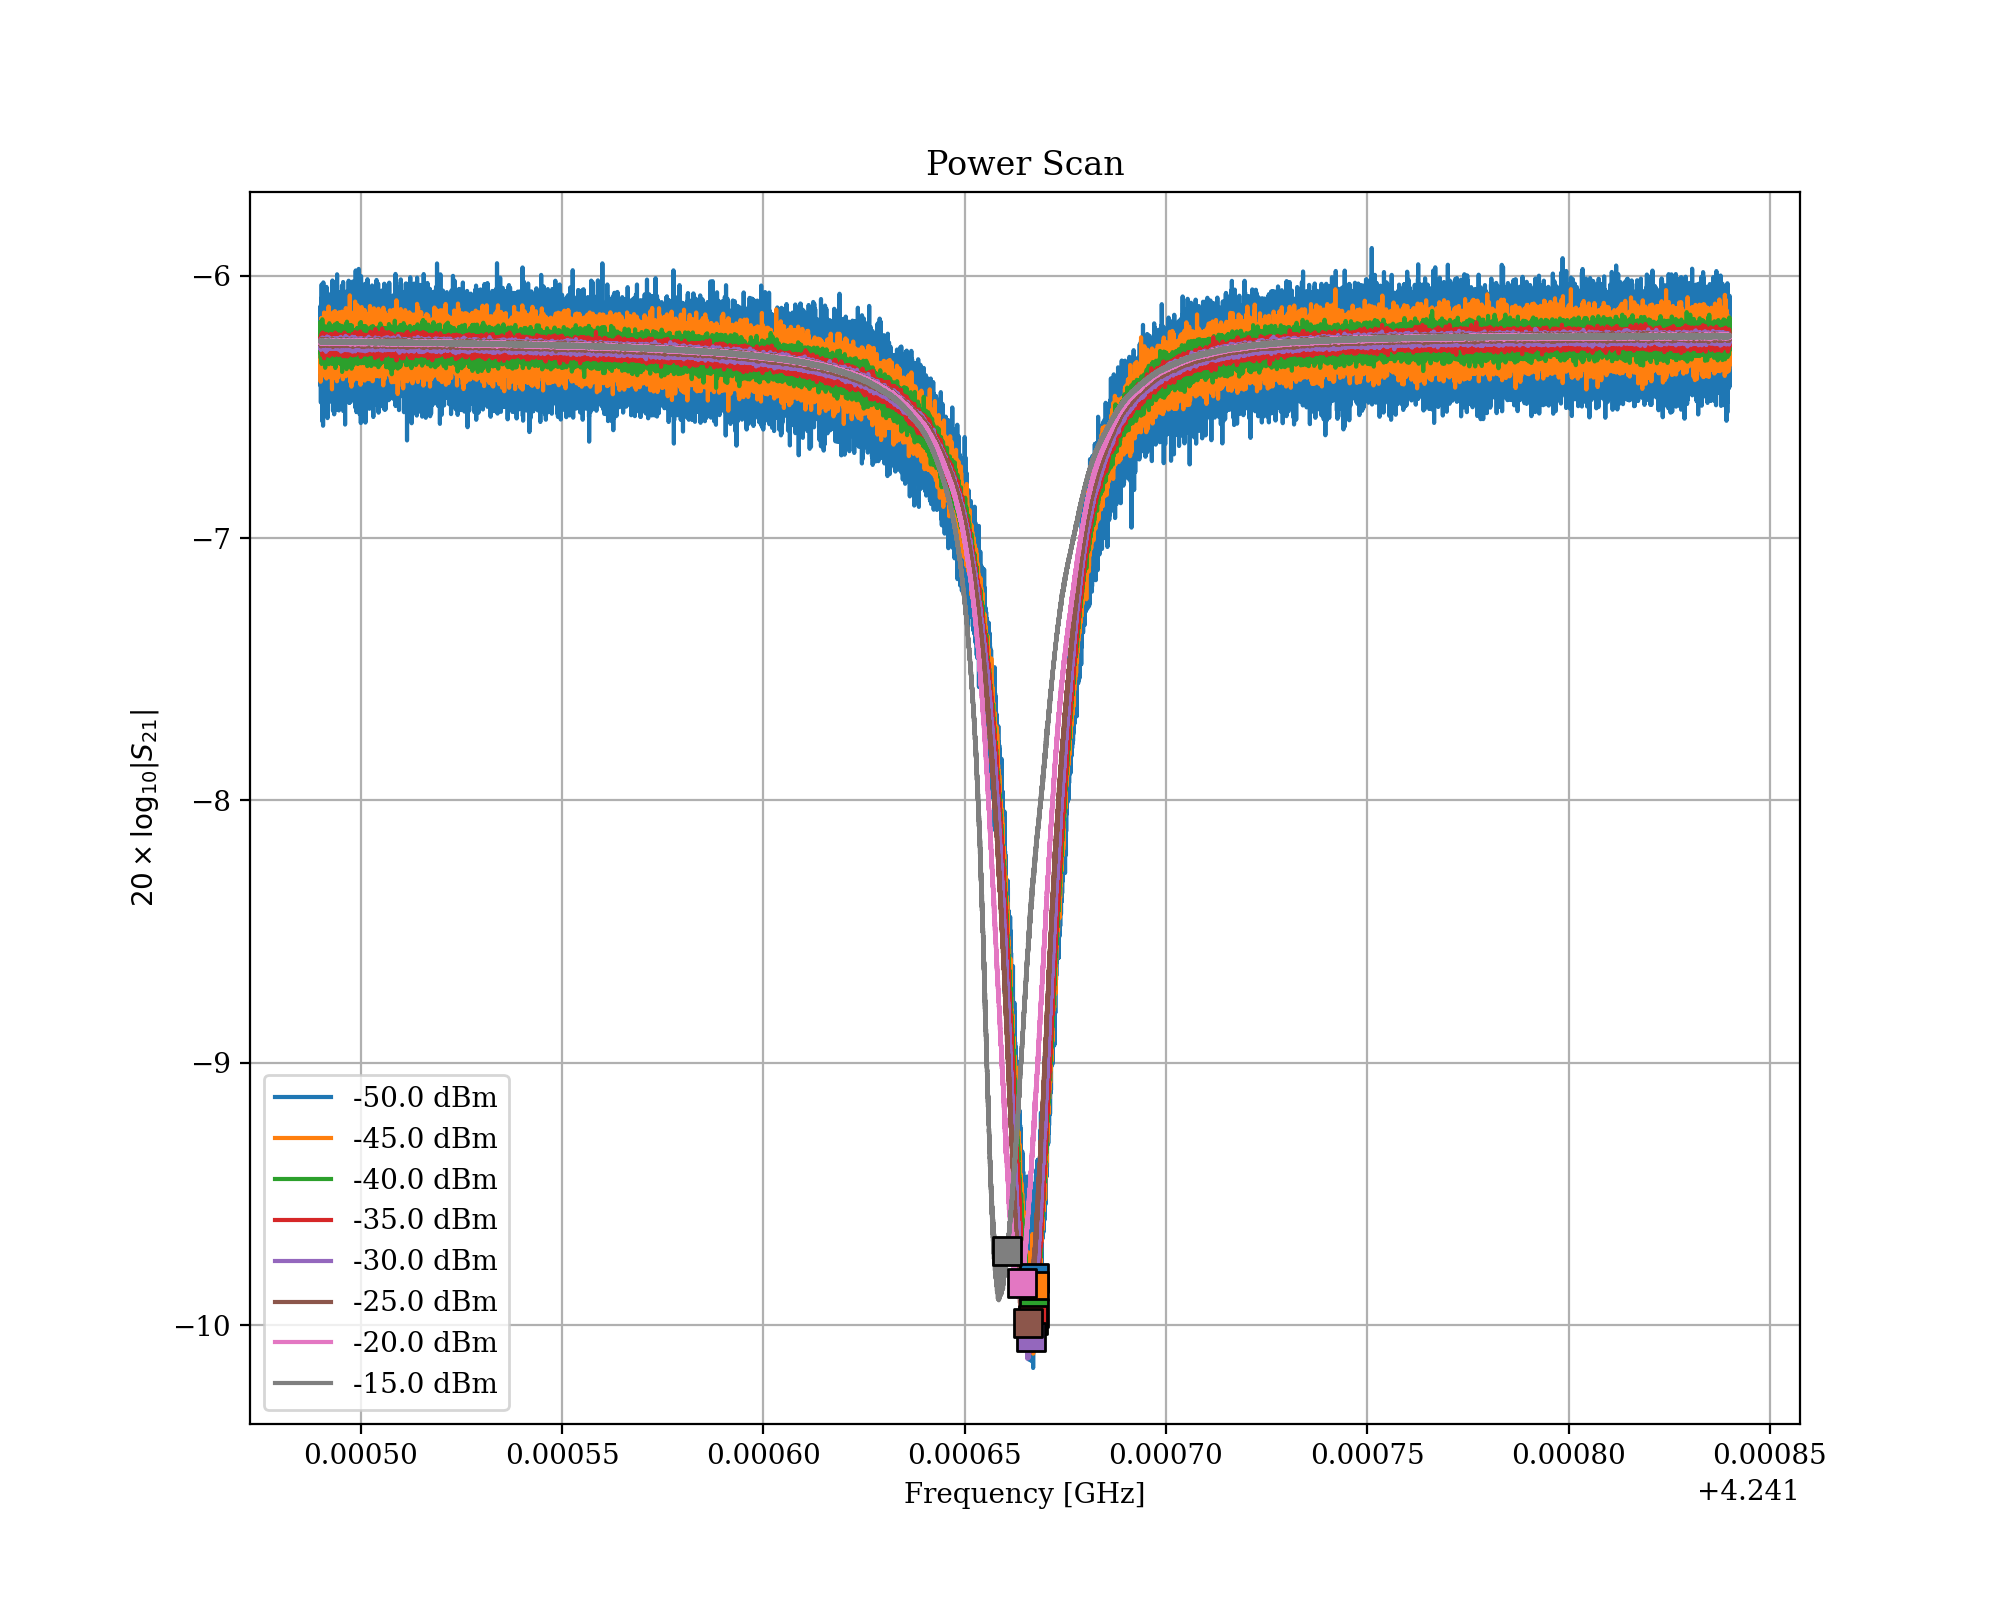

<IPython.core.display.Javascript object>


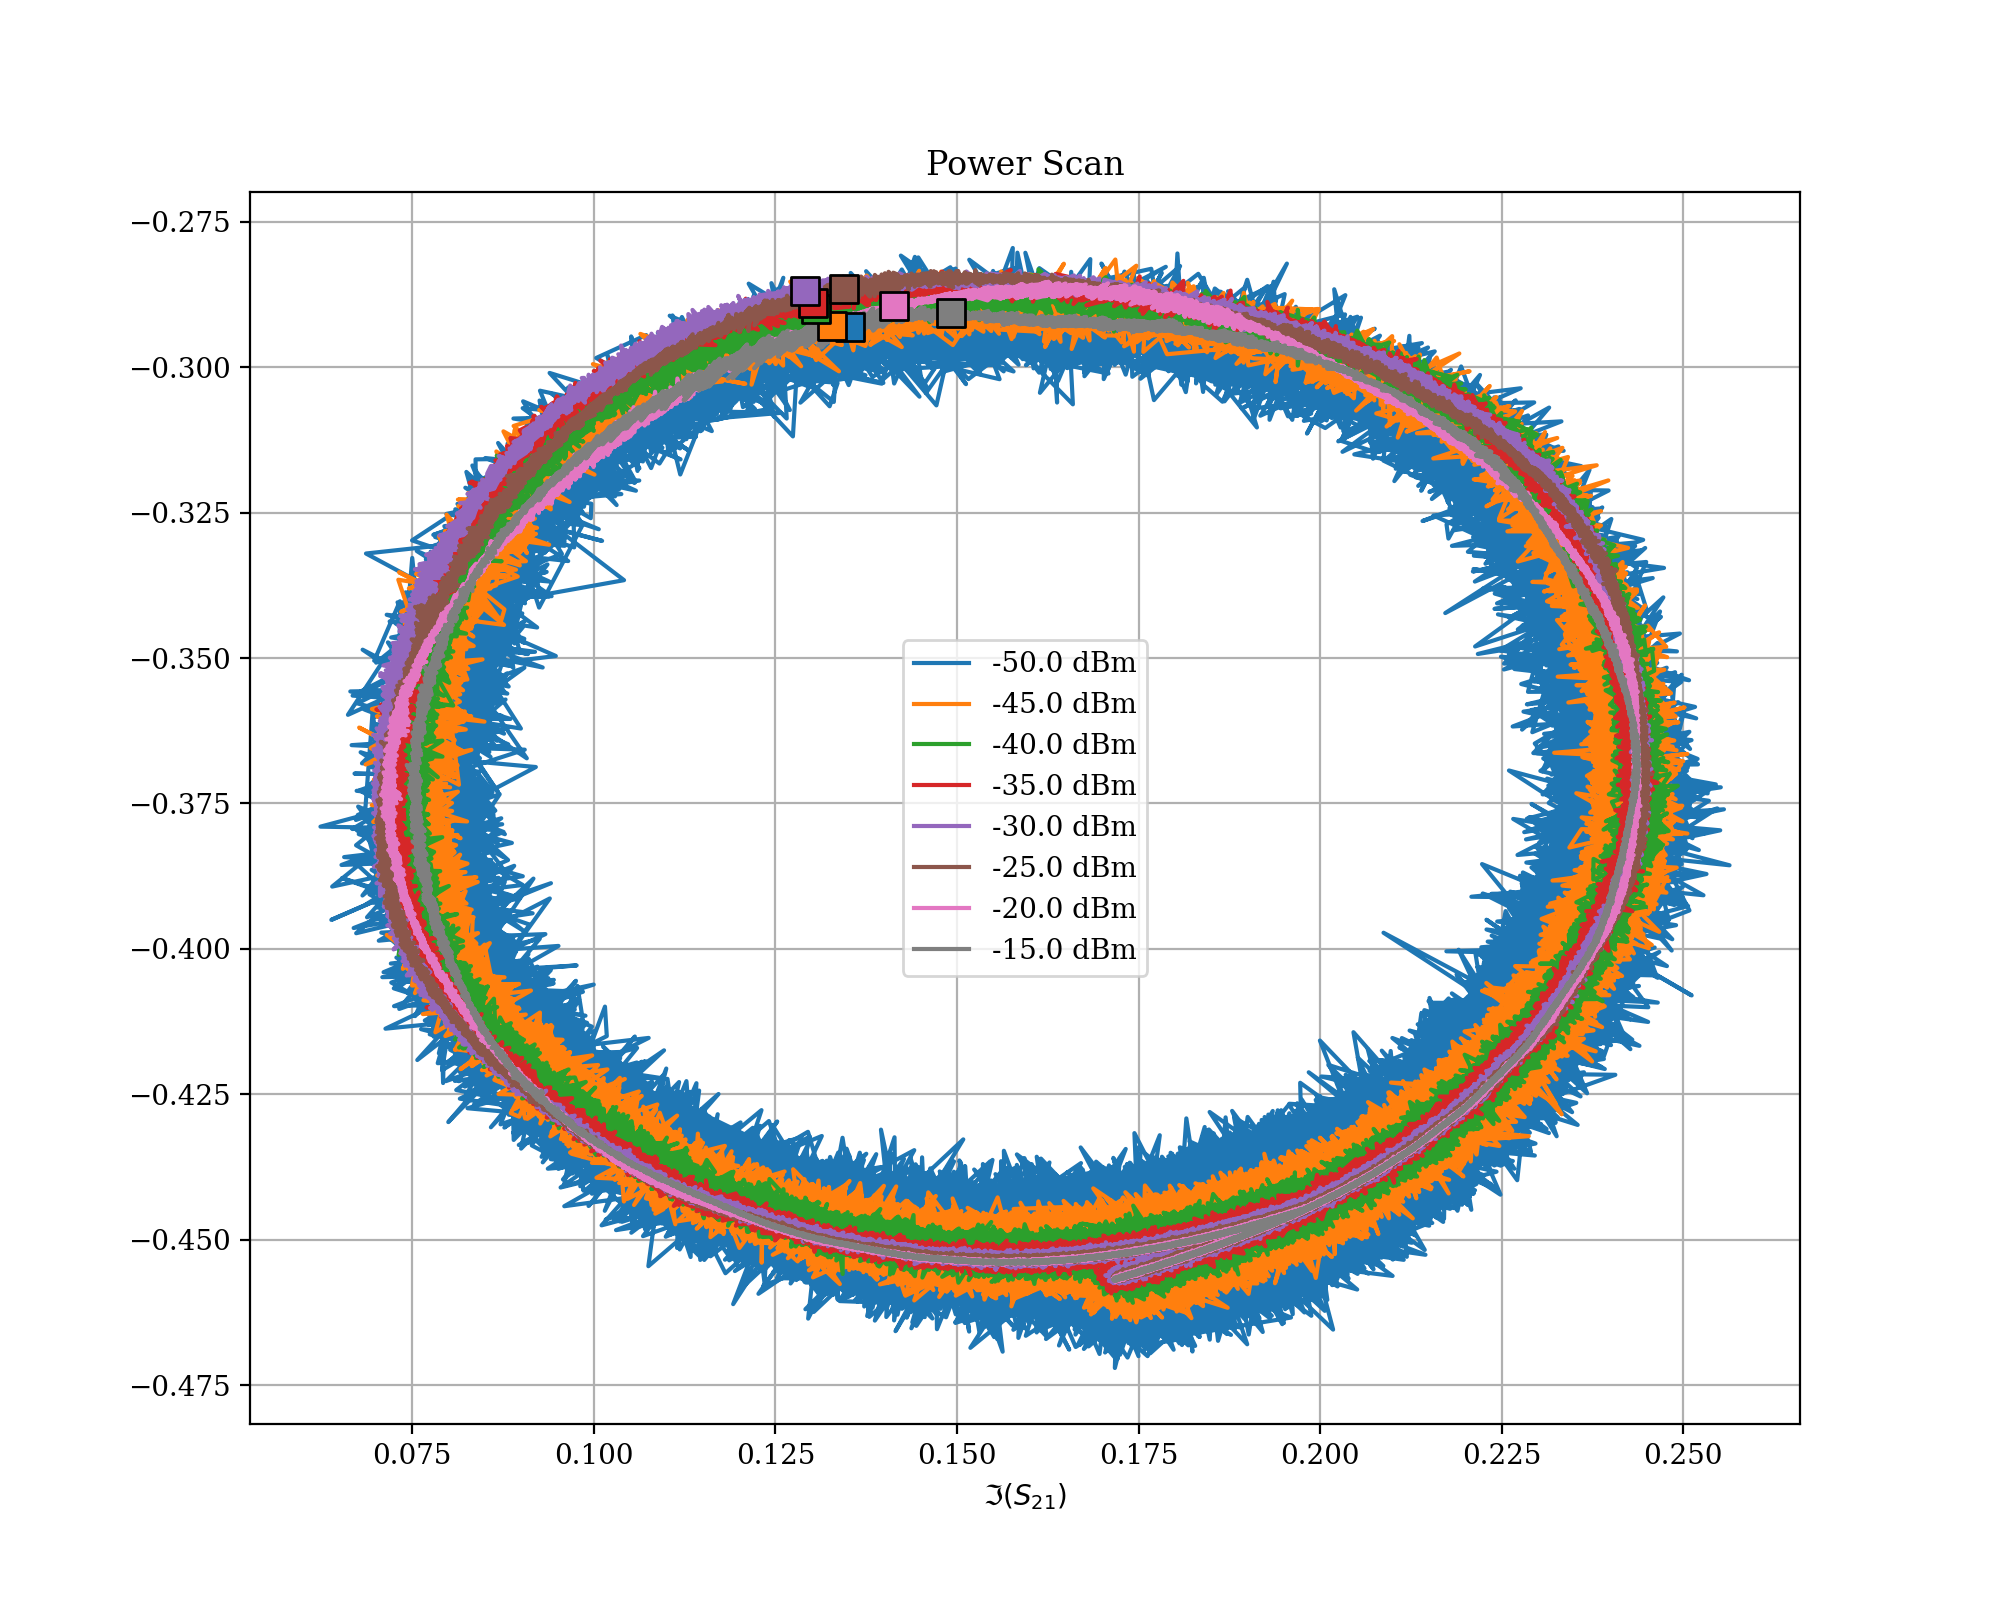

VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -50.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -50.0 dBm


<IPython.core.display.Javascript object>


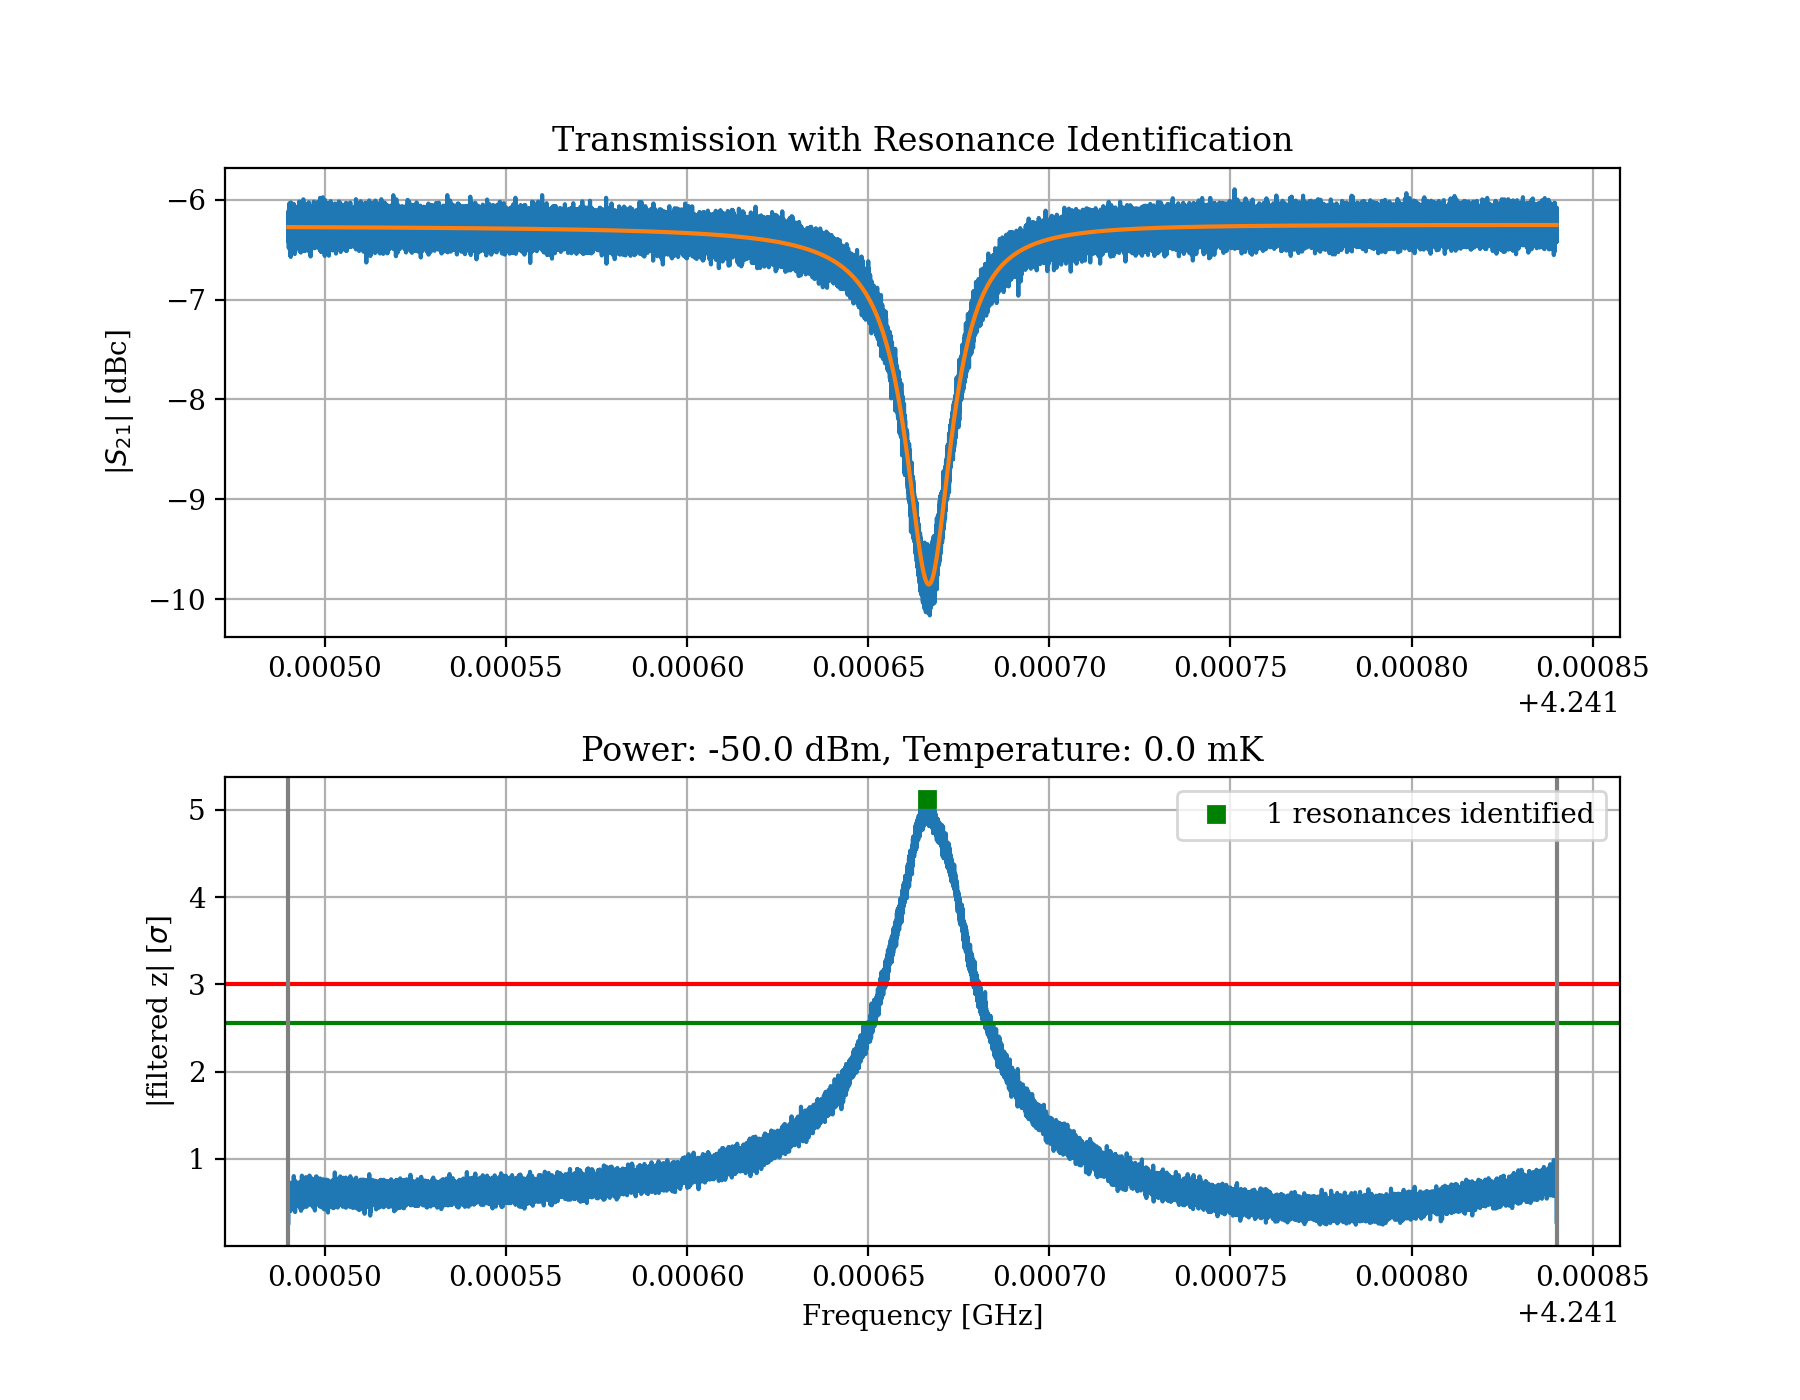

Resonance #0
Fine Fit result for peak 0
f0 : 4.241667138147327 +/- 5.303642083206286e-09
Qr : 221735.57398777563 +/- 6.05614142594542e-07
phi : -0.06846128993344161 +/- 0.0004268116480769287
zOff : (0.18517503533324164-0.450060743569929j) +/- (1.336985474164131e-05+1.2386818309414972e-05j)
QcHat : 652729.0856711691 +/- 2.7791996841037142e-06
tau : (43.59688595897432-0.025816984158605897j) +/- (0.03886588111512929+0.04302506889609569j)
Qc : 654261.7323419206 +/- 2.7791999372446118e-06
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -45.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -45.0 dBm


<IPython.core.display.Javascript object>


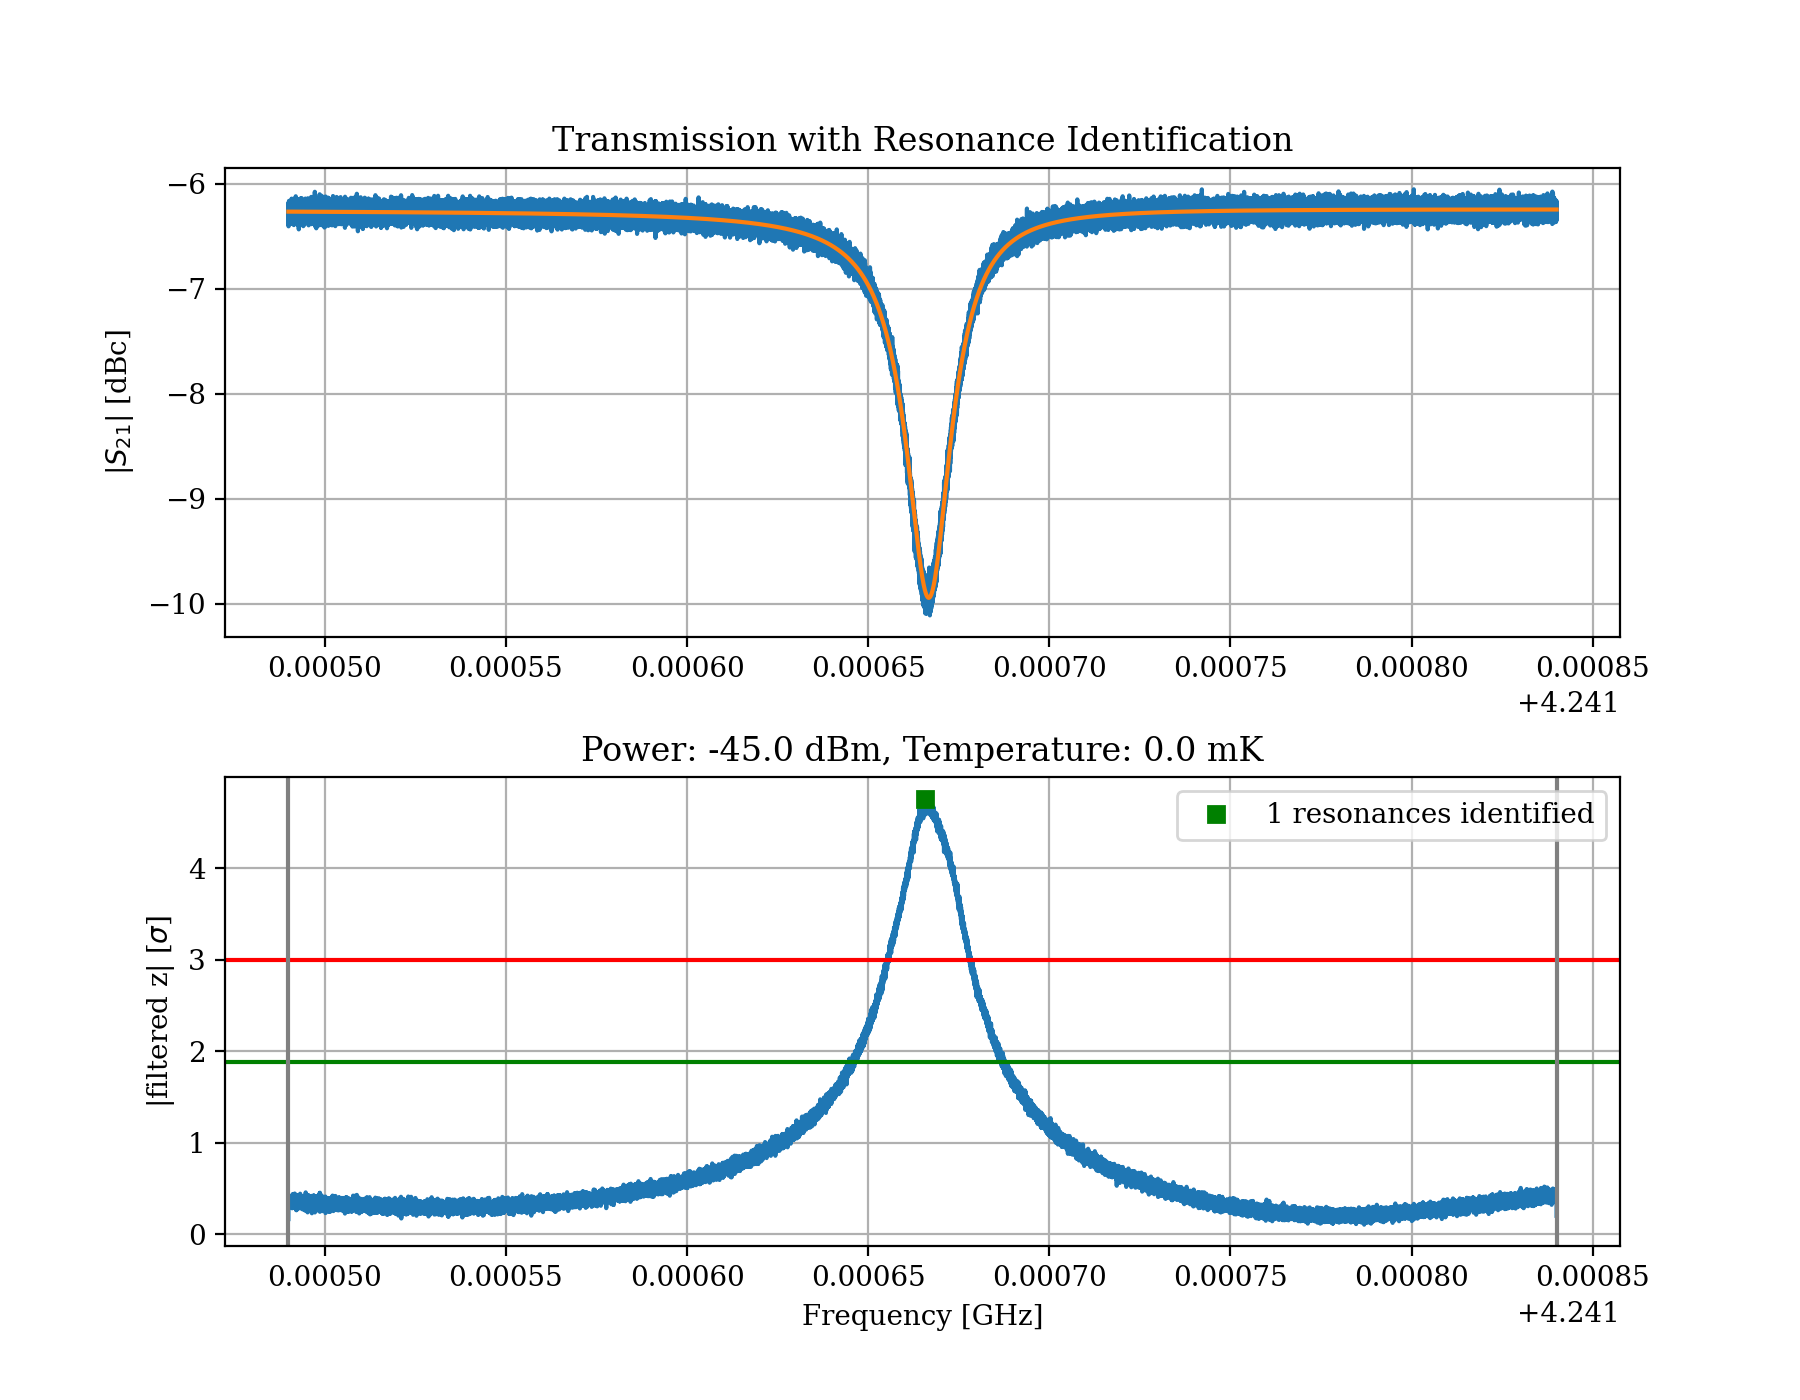

Resonance #0
Fine Fit result for peak 0
f0 : 4.241667122932915 +/- 2.912896717788861e-09
Qr : 226328.49367599236 +/- 3.299085976877995e-07
phi : -0.06888345573515842 +/- 0.00023874078830119356
zOff : (0.18576045944653566-0.45032305172191844j) +/- (7.579697739504525e-06+7.04023034929063e-06j)
QcHat : 652339.1765407422 +/- 1.5831990775229104e-06
tau : (43.59736927632351-0.0917551591939195j) +/- (0.022076947301860748+0.024388884076949686j)
Qc : 653889.8942675734 +/- 1.5831991226418402e-06
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -40.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -40.0 dBm


<IPython.core.display.Javascript object>


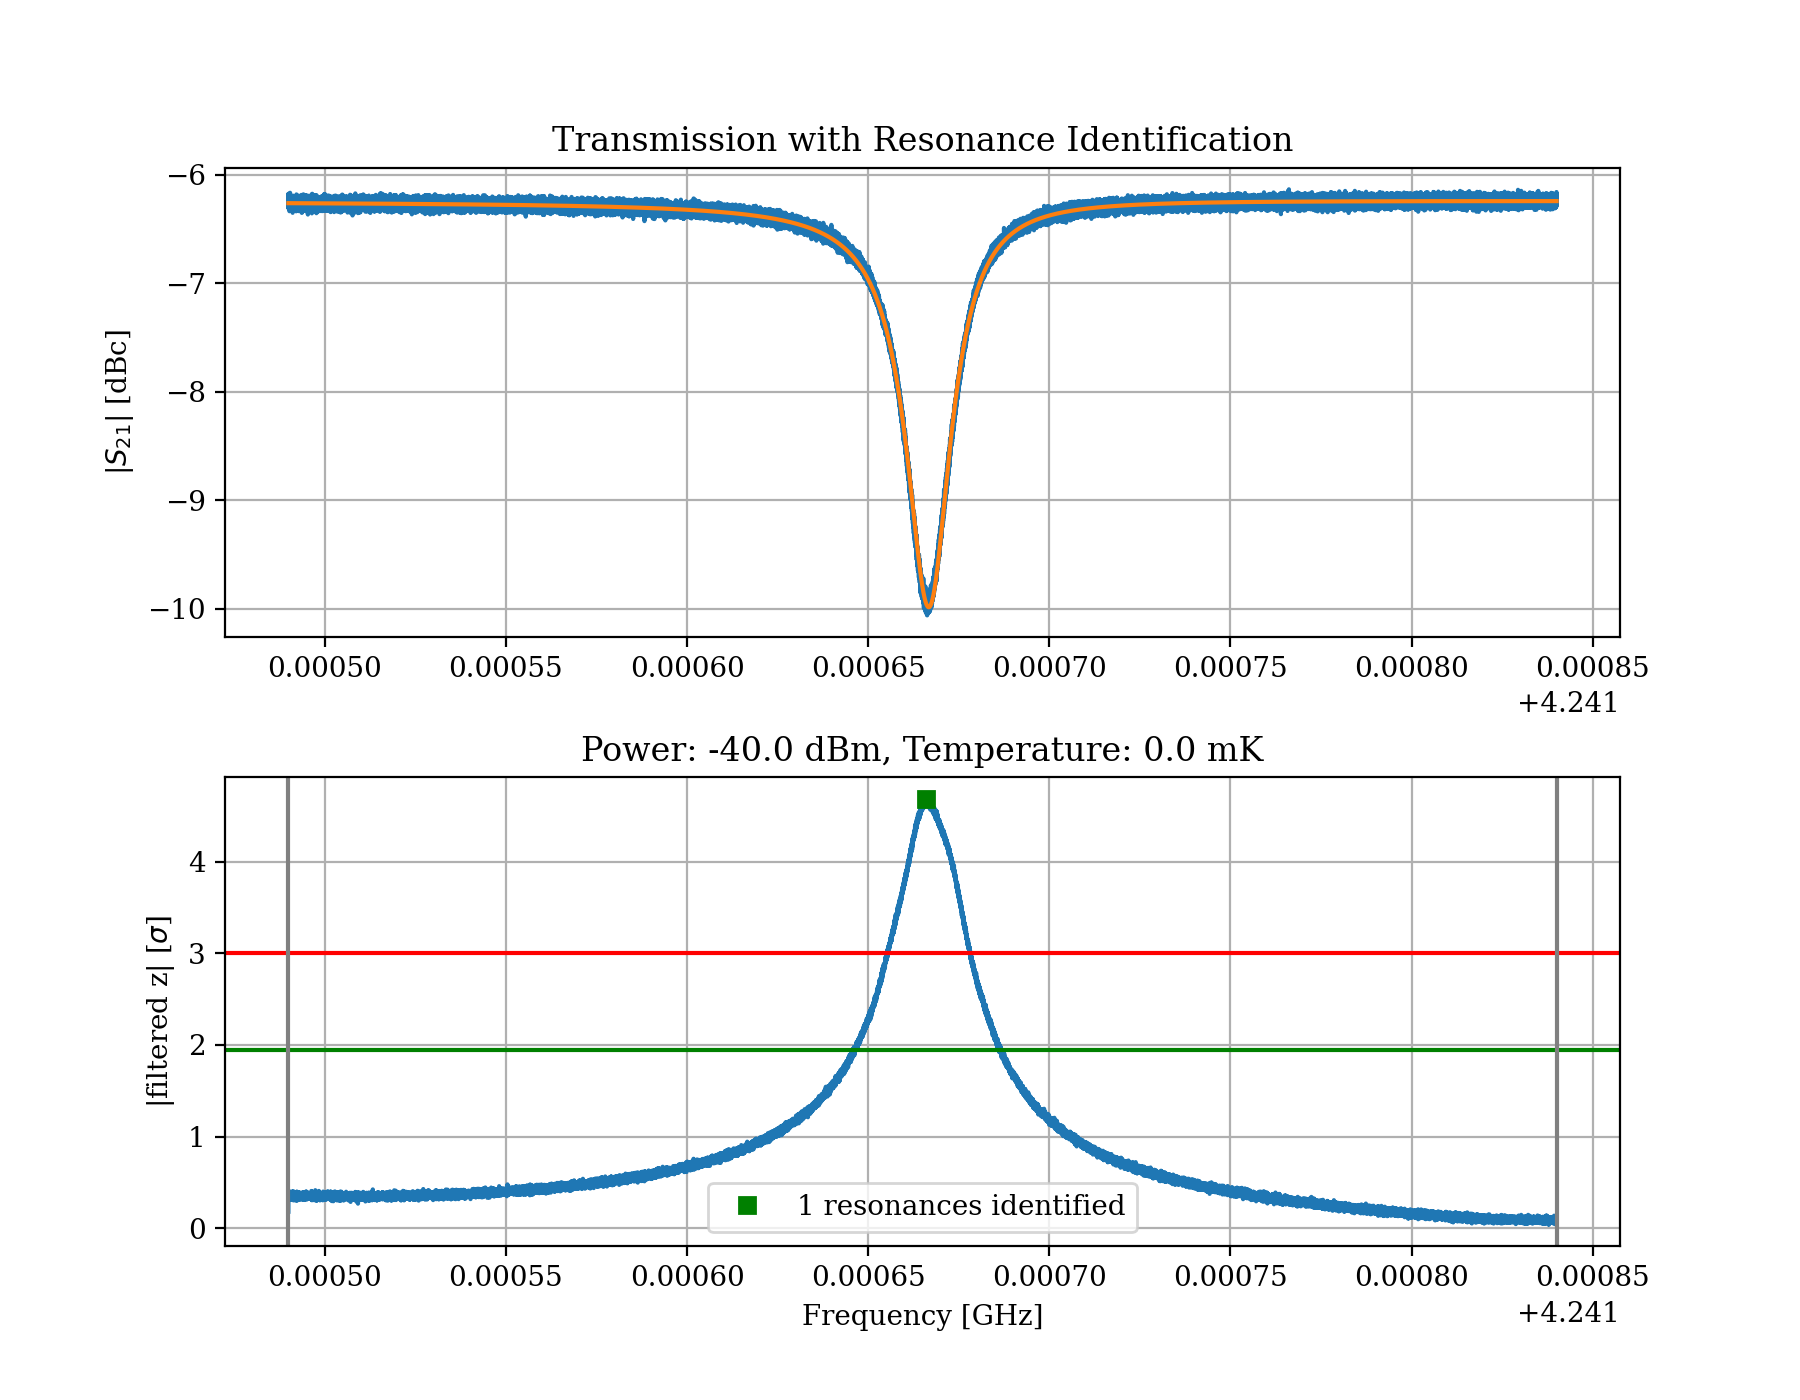

Resonance #0
Fine Fit result for peak 0
f0 : 4.241667122645437 +/- 1.6909468224061693e-09
Qr : 227931.11257934352 +/- 1.9208323898733536e-07
phi : -0.07229693432589791 +/- 0.0001394573483290362
zOff : (0.18553036664537007-0.4505007734180217j) +/- (4.460825823987379e-06+4.145281933888782e-06j)
QcHat : 650390.9958835952 +/- 9.384969711732133e-07
tau : (43.67291300076274-0.20711751948114024j) +/- (0.013001661501616649+0.014352014661507246j)
Qc : 652094.4525870661 +/- 9.384969802993231e-07
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -35.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -35.0 dBm


<IPython.core.display.Javascript object>


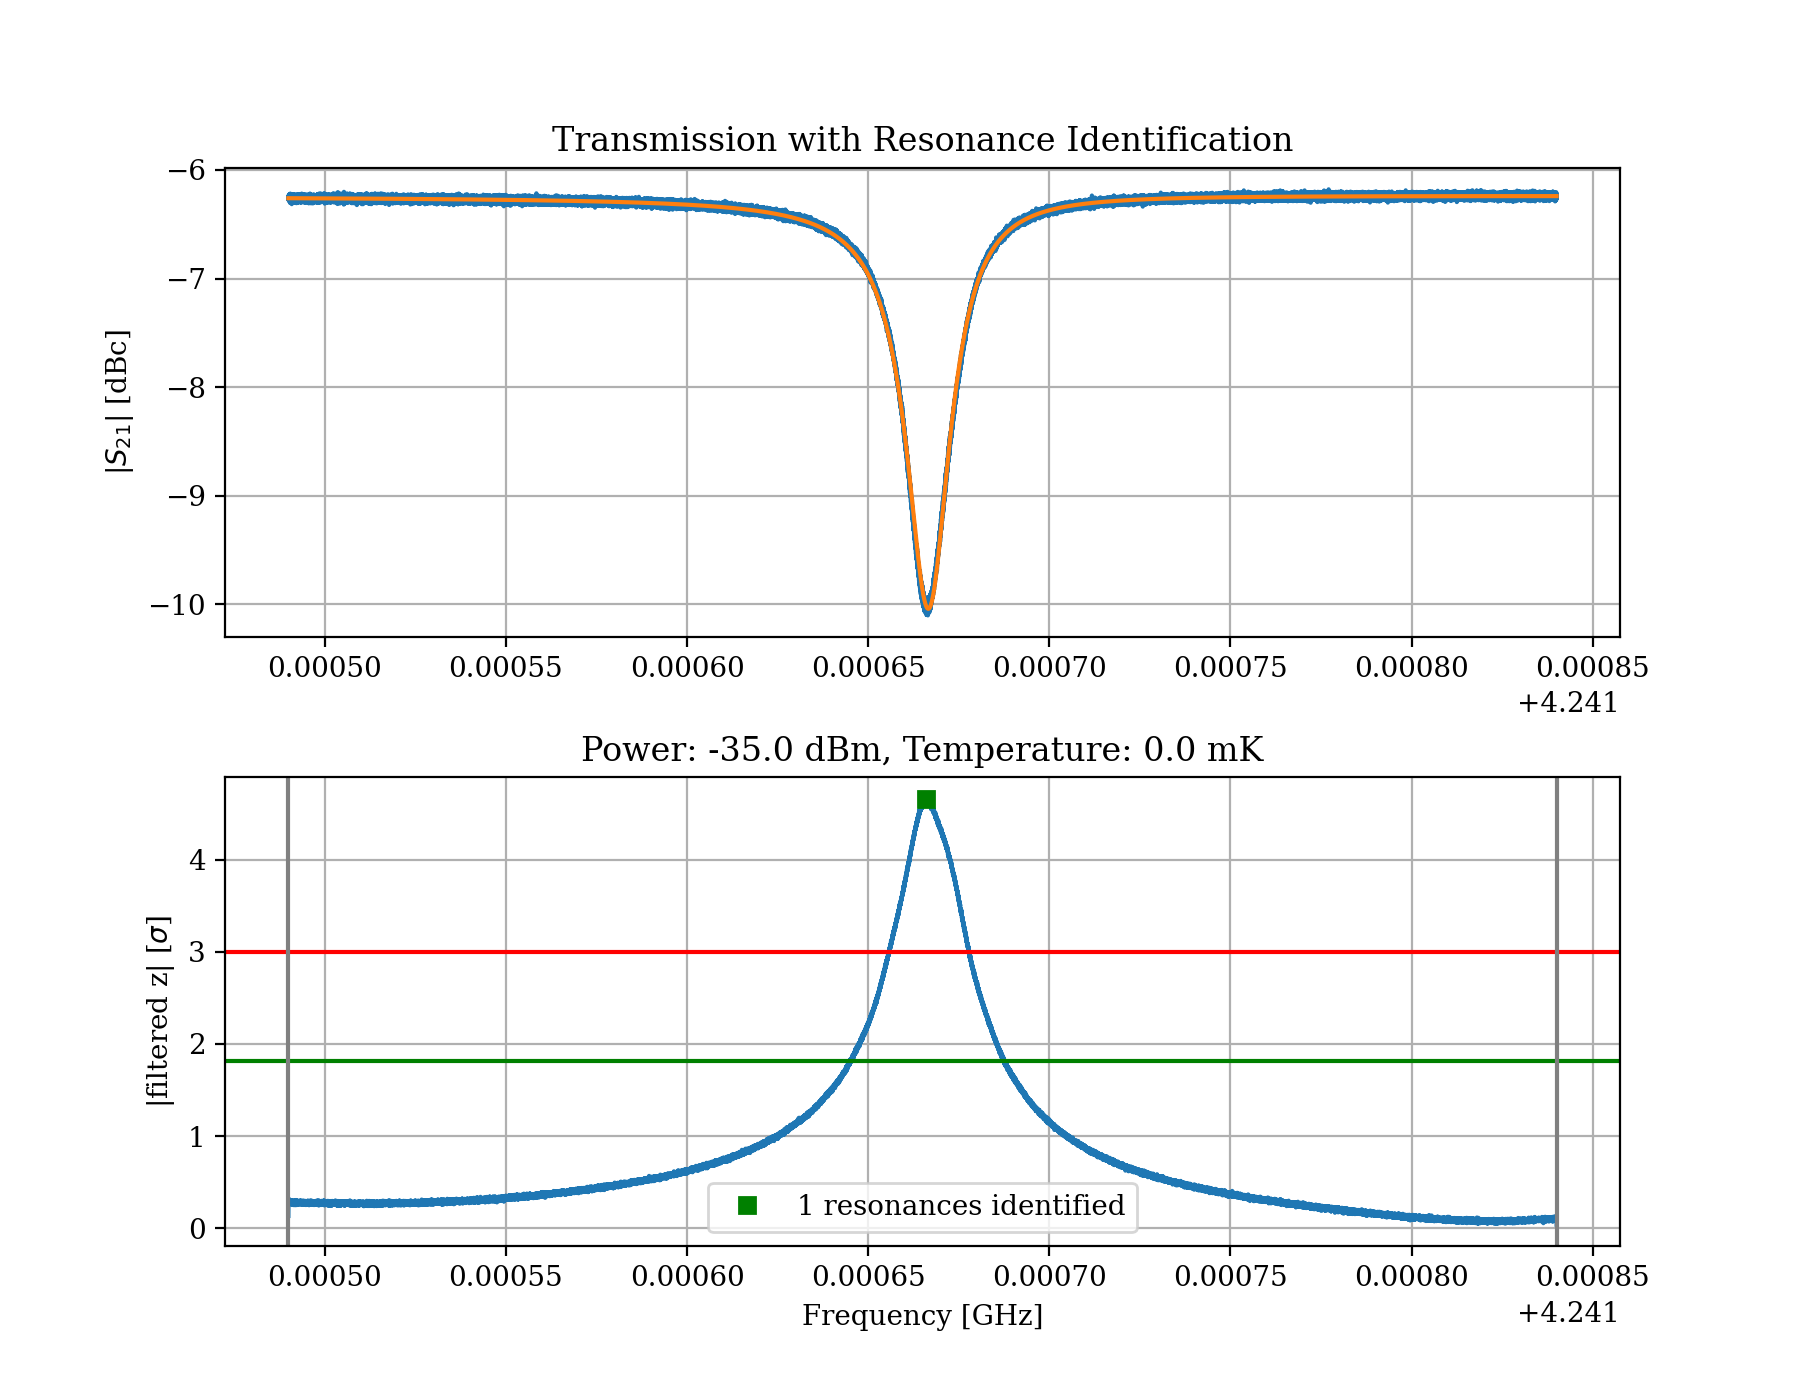

Resonance #0
Fine Fit result for peak 0
f0 : 4.241666994557823 +/- 1.0687689142319463e-09
Qr : 230744.28623751624 +/- 1.2051316221972942e-07
phi : -0.07074042054629862 +/- 8.911765408428678e-05
zOff : (0.18444118831482267-0.45109388713309195j) +/- (2.8709660349192086e-06+2.671688564134414e-06j)
QcHat : 650554.2635172989 +/- 6.05131249750469e-07
tau : (43.649026891665706-0.16597604284069253j) +/- (0.008379486806204598+0.009238761541540318j)
Qc : 652185.4185780339 +/- 6.051312521534319e-07
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -30.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -30.0 dBm


<IPython.core.display.Javascript object>


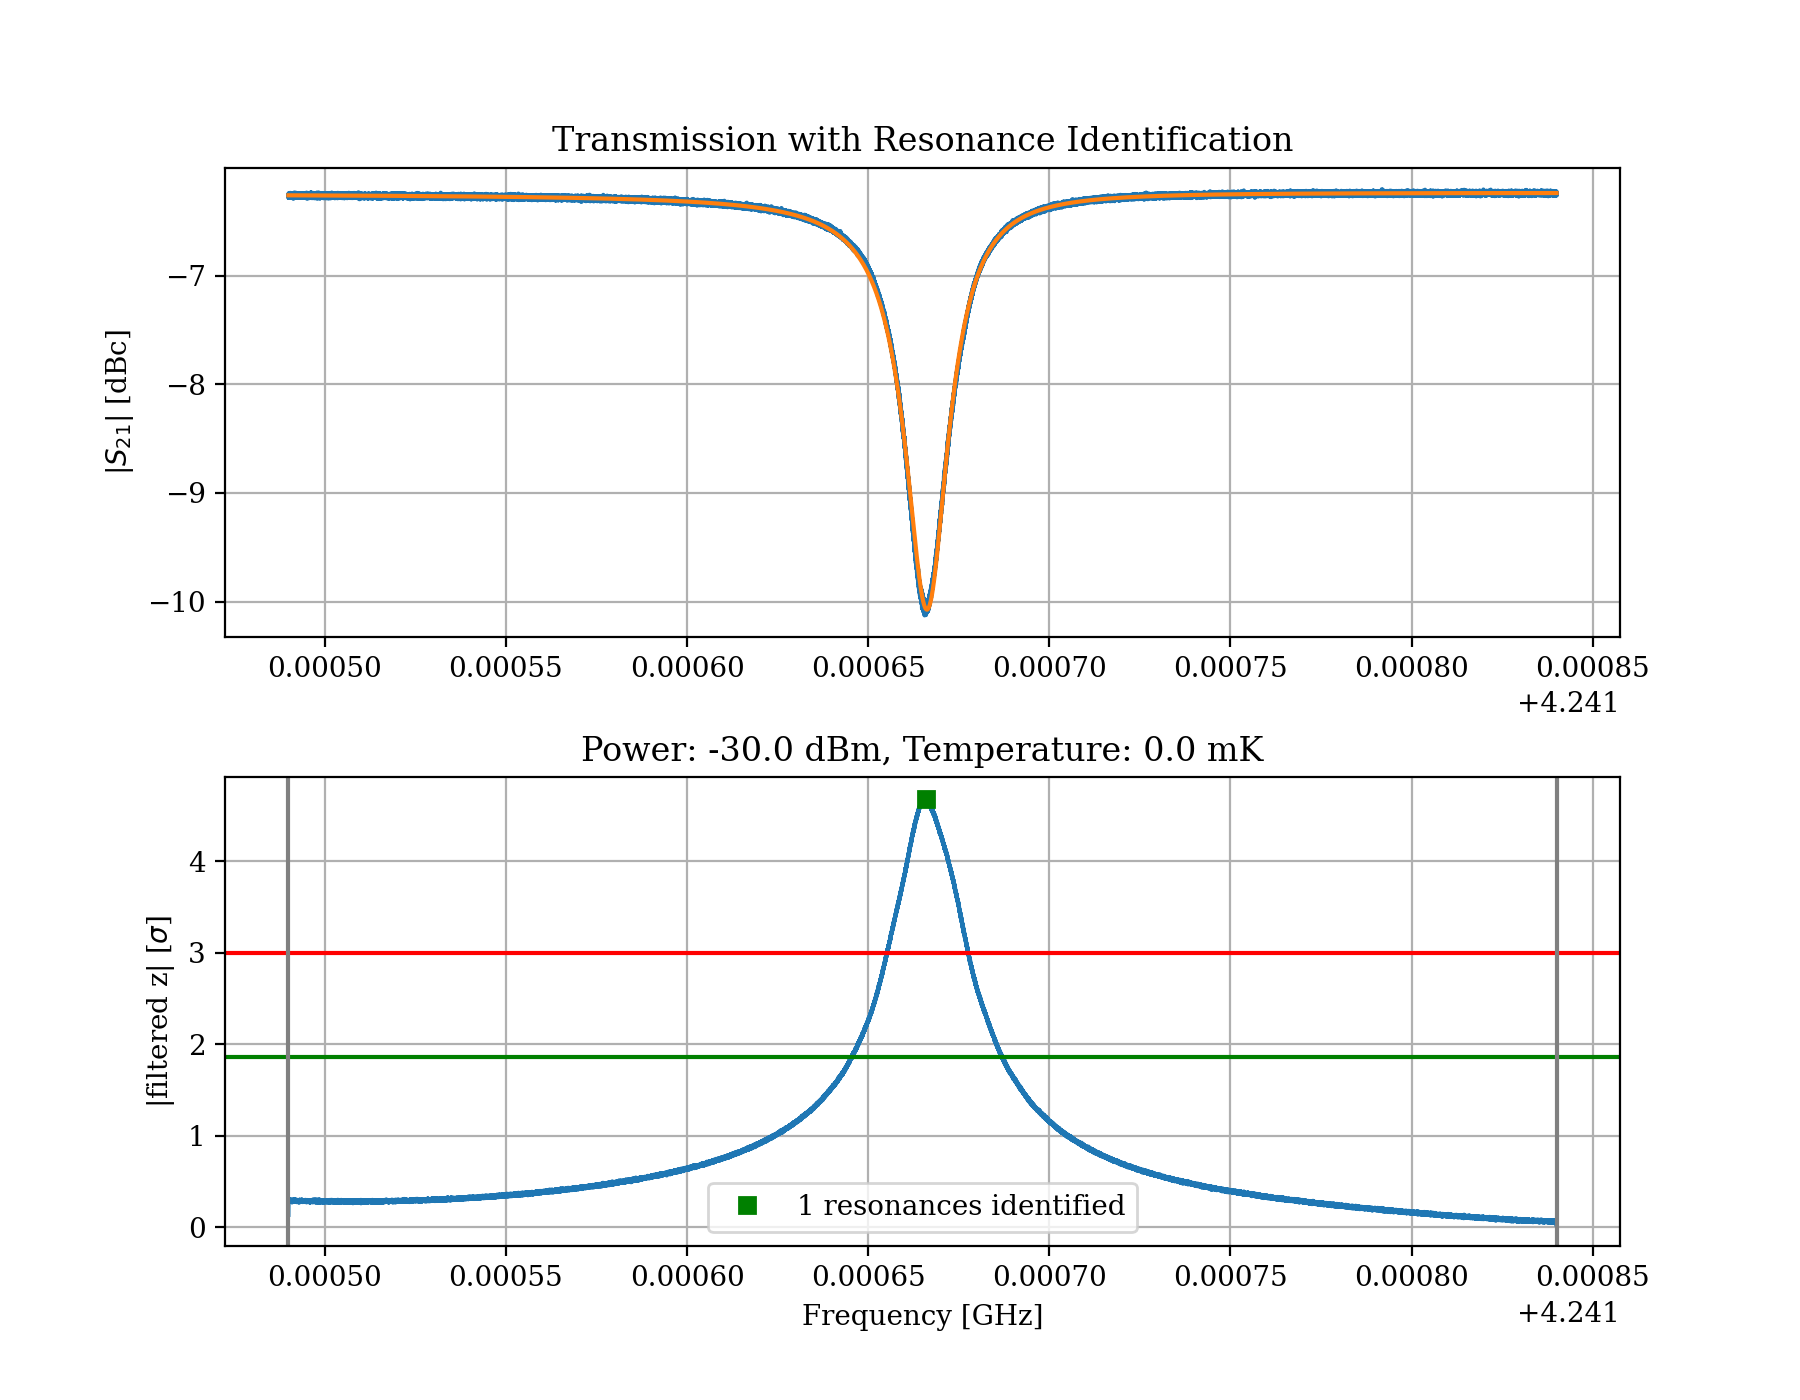

Resonance #0
Fine Fit result for peak 0
f0 : 4.241666584669667 +/- 8.732762198766046e-10
Qr : 232285.4928175174 +/- 9.789801162812438e-08
phi : -0.06504070578550729 +/- 7.324966111142666e-05
zOff : (0.18511054661855575-0.4509764866814727j) +/- (2.370416973184426e-06+2.20990024607491e-06j)
QcHat : 649995.6901378934 +/- 5.012840863740943e-07
tau : (43.648508994250804+0.009266117053145673j) +/- (0.0069262928806106145+0.007631969788062386j)
Qc : 651372.9538728497 +/- 5.012840877189174e-07
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -25.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -25.0 dBm


<IPython.core.display.Javascript object>


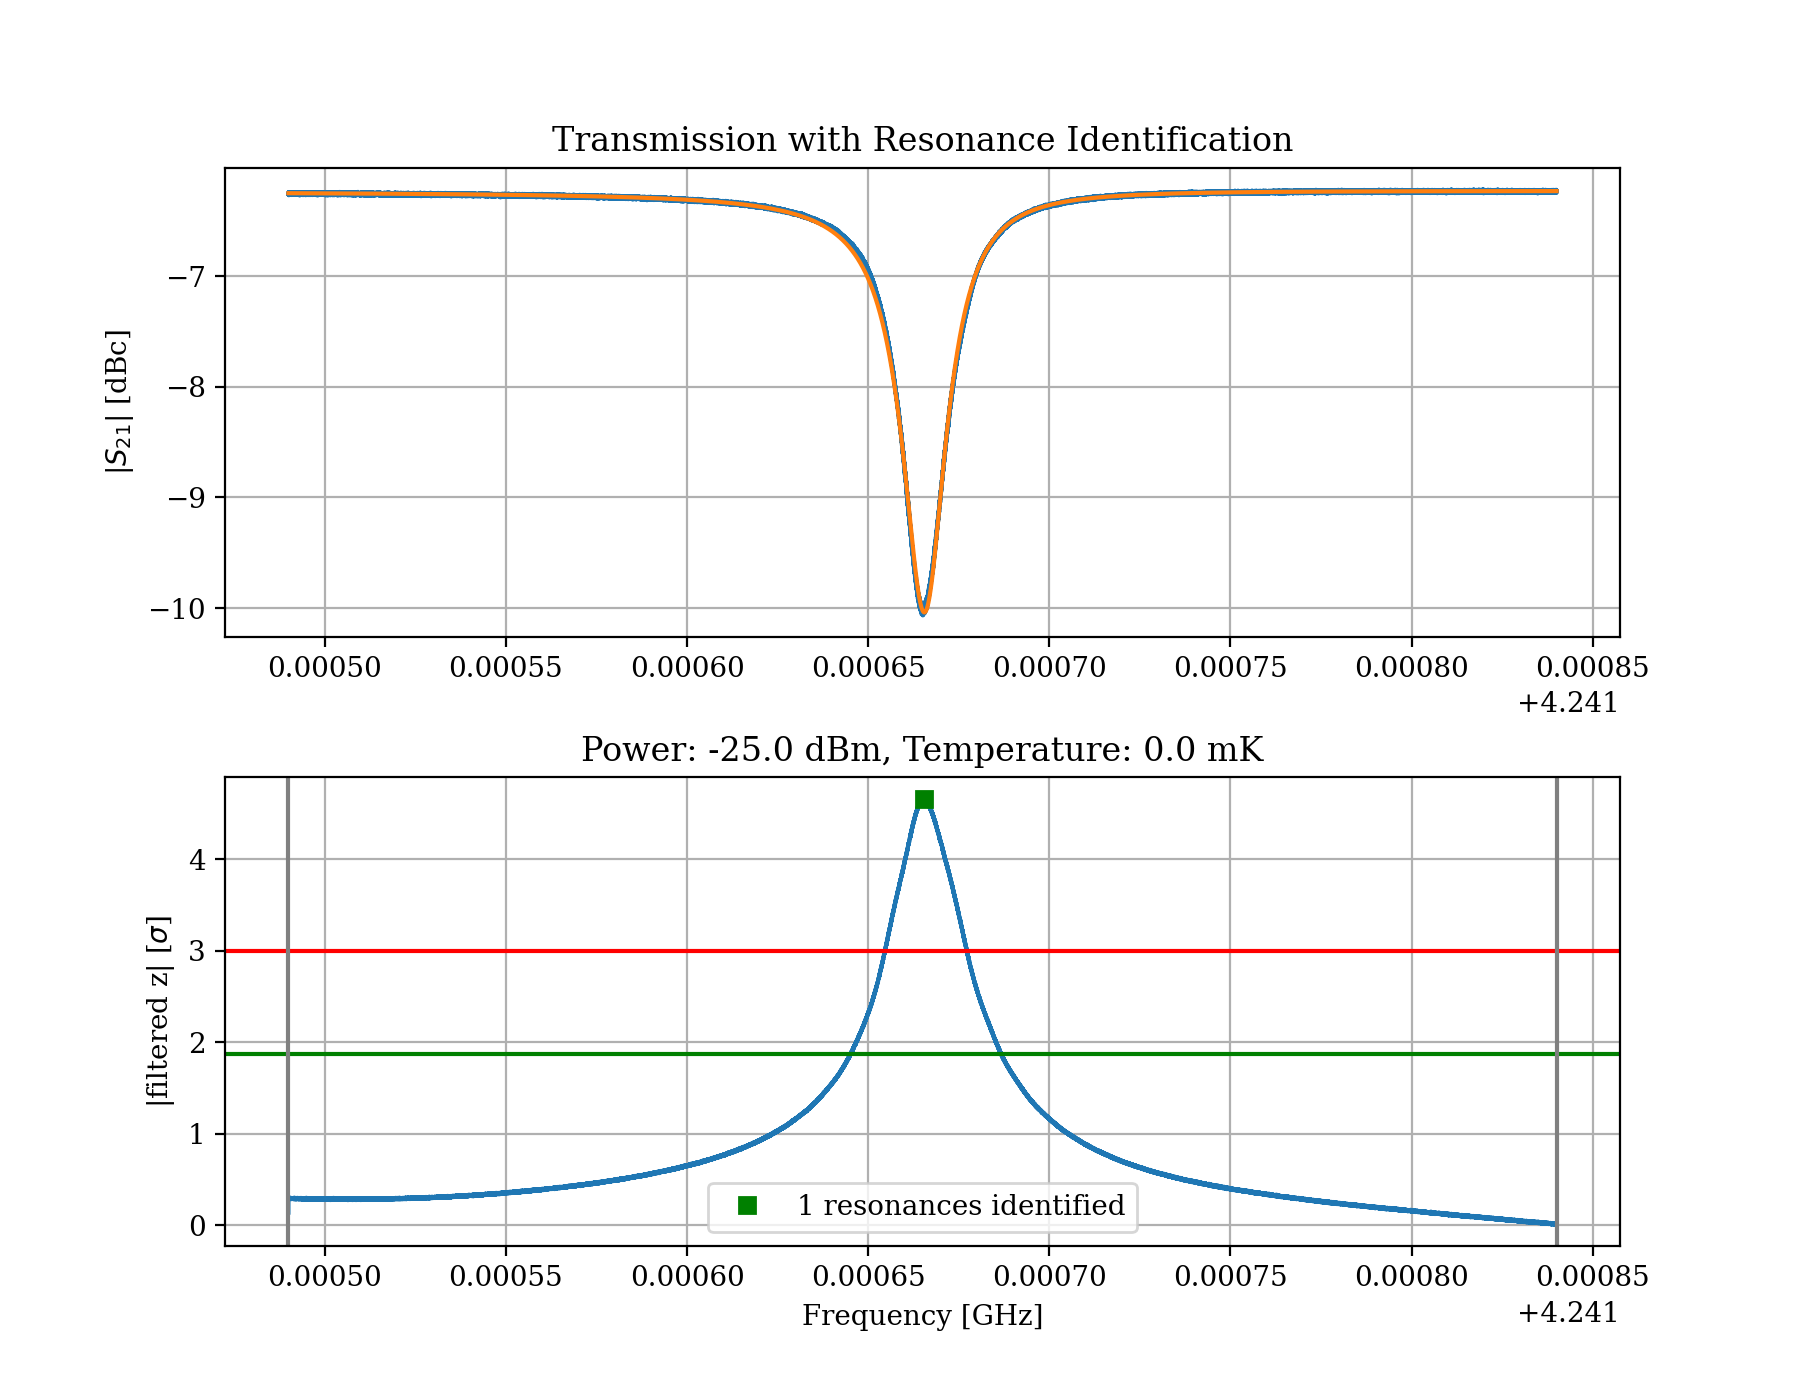

Resonance #0
Fine Fit result for peak 0
f0 : 4.2416658686497115 +/- 1.0984688152492223e-09
Qr : 230734.4023363971 +/- 1.229197581730169e-07
phi : -0.06347106380092771 +/- 9.158600259983395e-05
zOff : (0.18571420206265316-0.45107205195402394j) +/- (2.9533023455967124e-06+2.7533012660155423e-06j)
QcHat : 649921.8103266816 +/- 6.236030204827495e-07
tau : (43.584372433843264-0.07183529204527354j) +/- (0.00862047572747039+0.009504024191068342j)
Qc : 651233.1410867928 +/- 6.236030230981393e-07
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -20.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -20.0 dBm


<IPython.core.display.Javascript object>


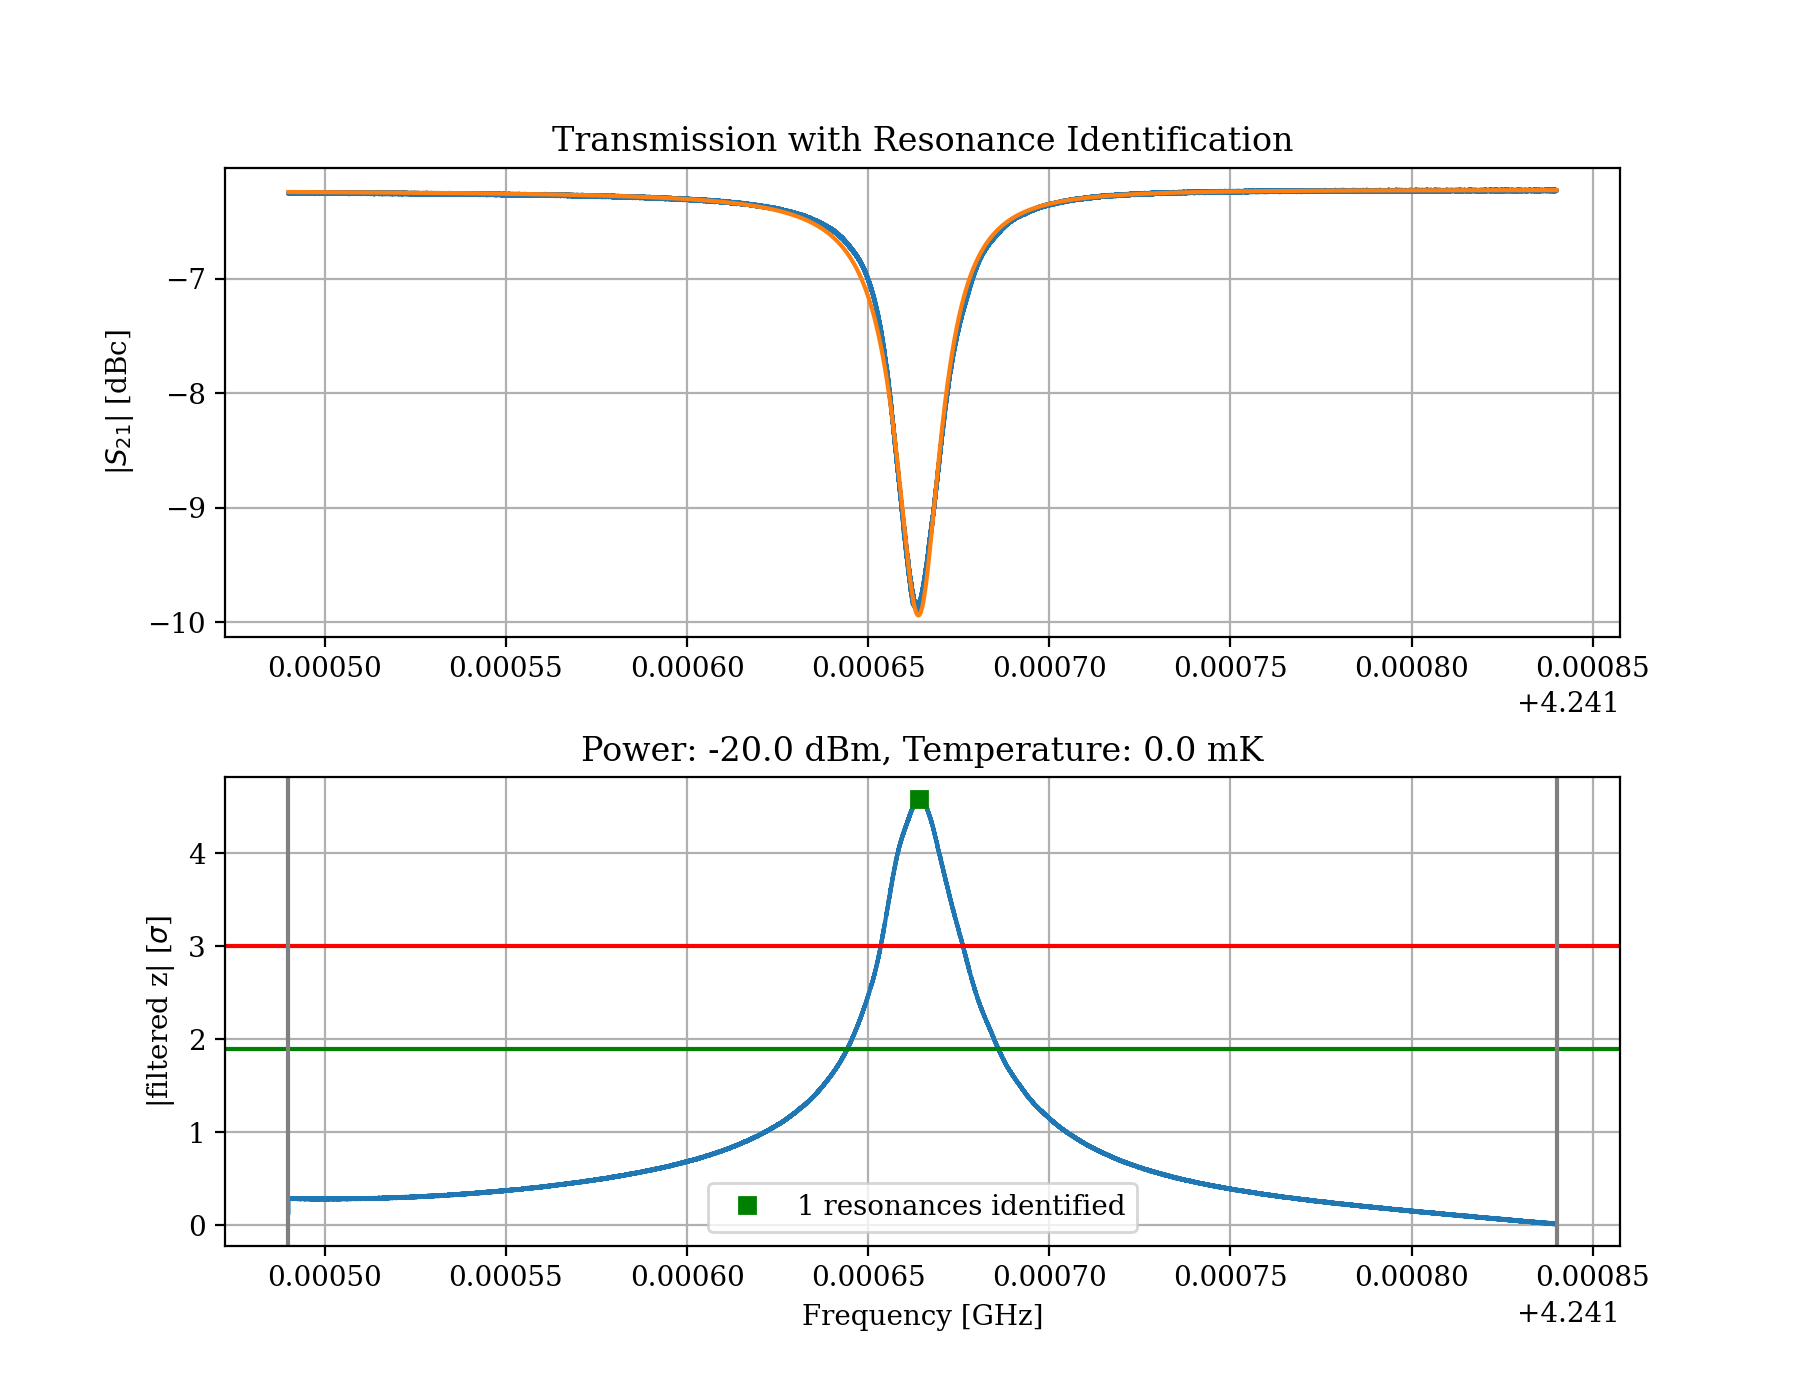

Resonance #0
Fine Fit result for peak 0
f0 : 4.241664202471963 +/- 1.9504479448771234e-09
Qr : 226553.48268841638 +/- 2.173189737397594e-07
phi : -0.057779274984263704 +/- 0.0001599843986926229
zOff : (0.1863458145632413-0.45112558351987797j) +/- (5.094859250227203e-06+4.748636844084883e-06j)
QcHat : 650982.2160879833 +/- 1.0680401245846036e-06
tau : (43.55952888025243-0.12383137196464539j) +/- (0.014840086012067724+0.01638726983350652j)
Qc : 652070.3637087758 +/- 1.0680401382528513e-06
VNA Measurement: 20240304_114602
====---------------------------====
|             Date:   20240304
|   RF Power [dBm]:   -15.0
|   N averages:       15
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241490000.0
|   Sweep f max [Hz]: 4241840000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -15.0 dBm


<IPython.core.display.Javascript object>


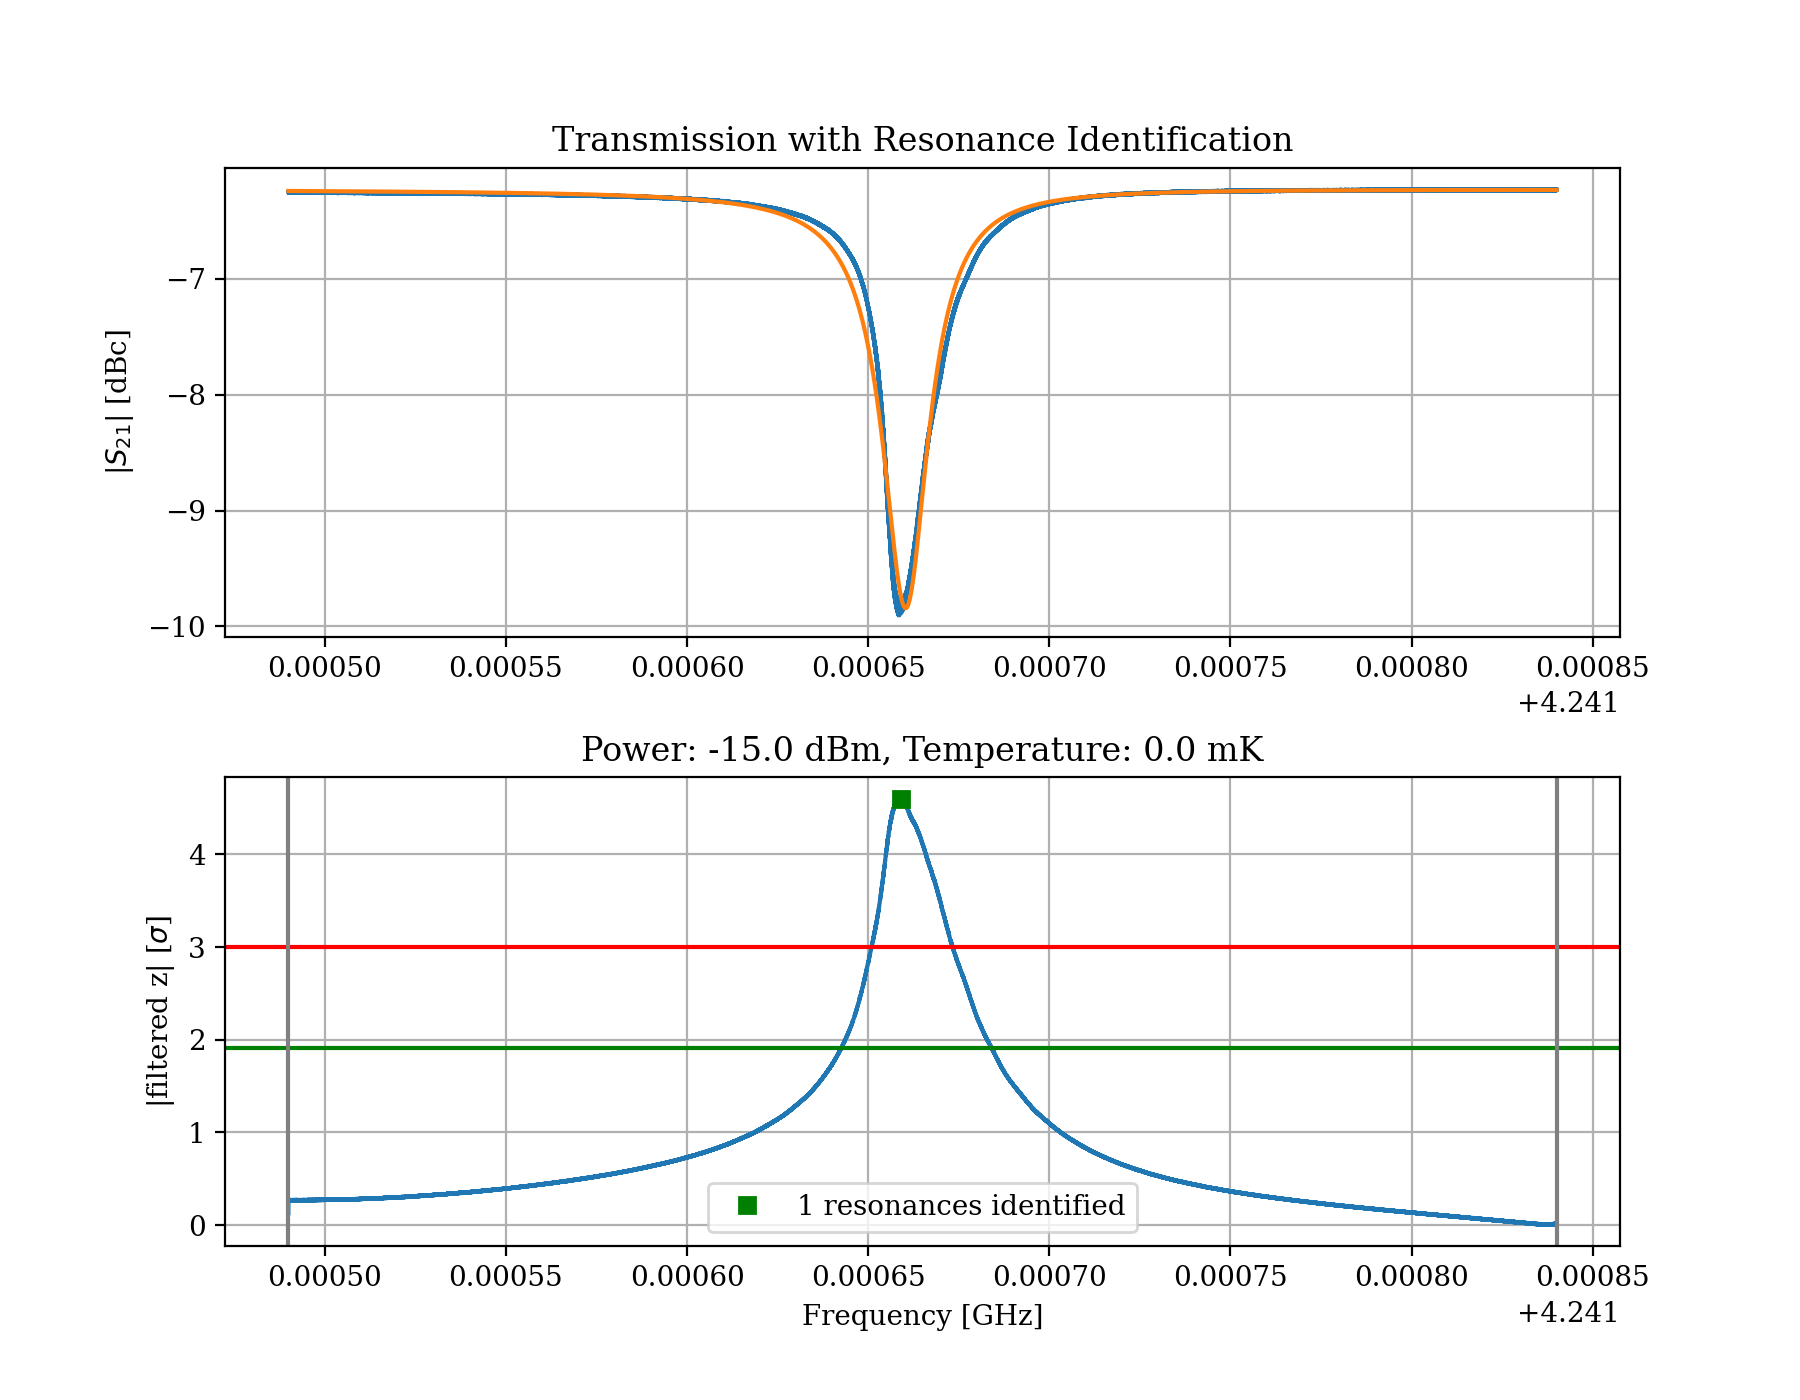

Resonance #0
Fine Fit result for peak 0
f0 : 4.241660632588485 +/- 4.325268645541468e-09
Qr : 222440.87705998722 +/- 4.774958121383038e-07
phi : -0.04755428237155971 +/- 0.0003490327726526041
zOff : (0.18810174920950762-0.4505267307437059j) +/- (1.0959335907702608e-05+1.0235122376888618e-05j)
QcHat : 652834.1561455469 +/- 2.2751753968189614e-06
tau : (43.51972615110035-0.3516029321110361j) +/- (0.031871611866861056+0.035238482099483756j)
Qc : 653573.0150927134 +/- 2.275175535404312e-06


<IPython.core.display.Javascript object>


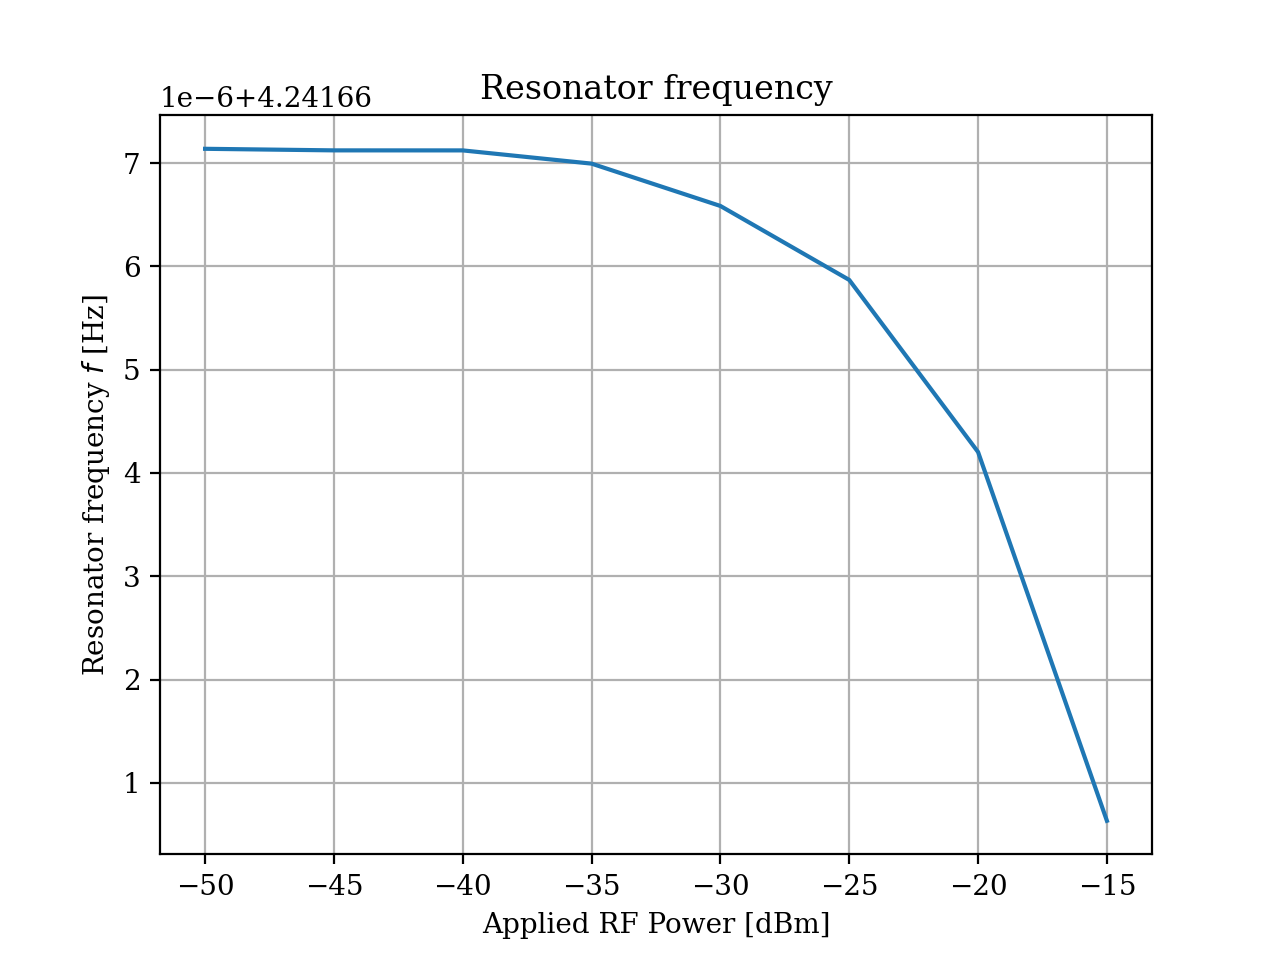

<IPython.core.display.Javascript object>


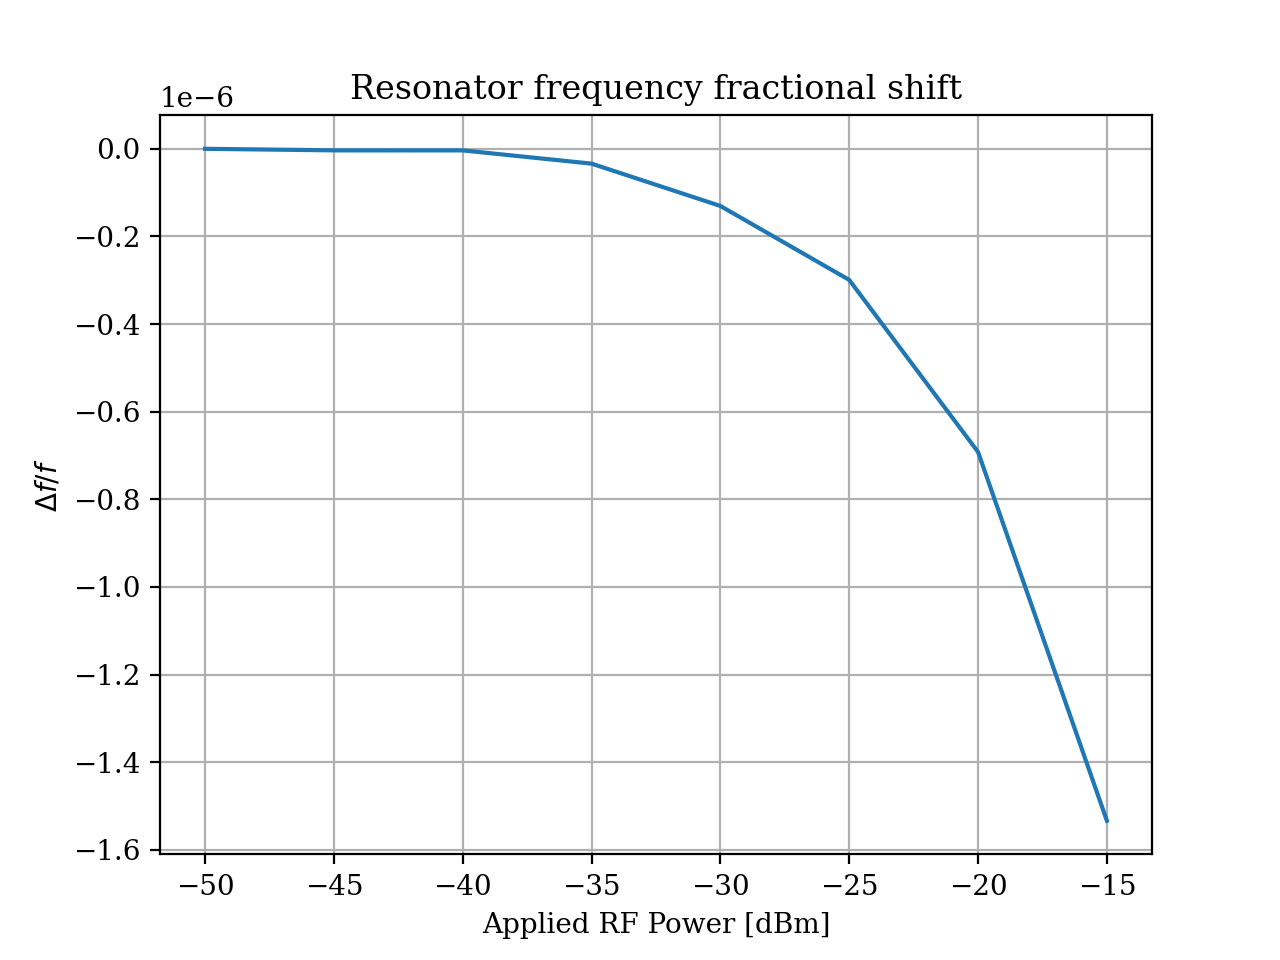

<IPython.core.display.Javascript object>


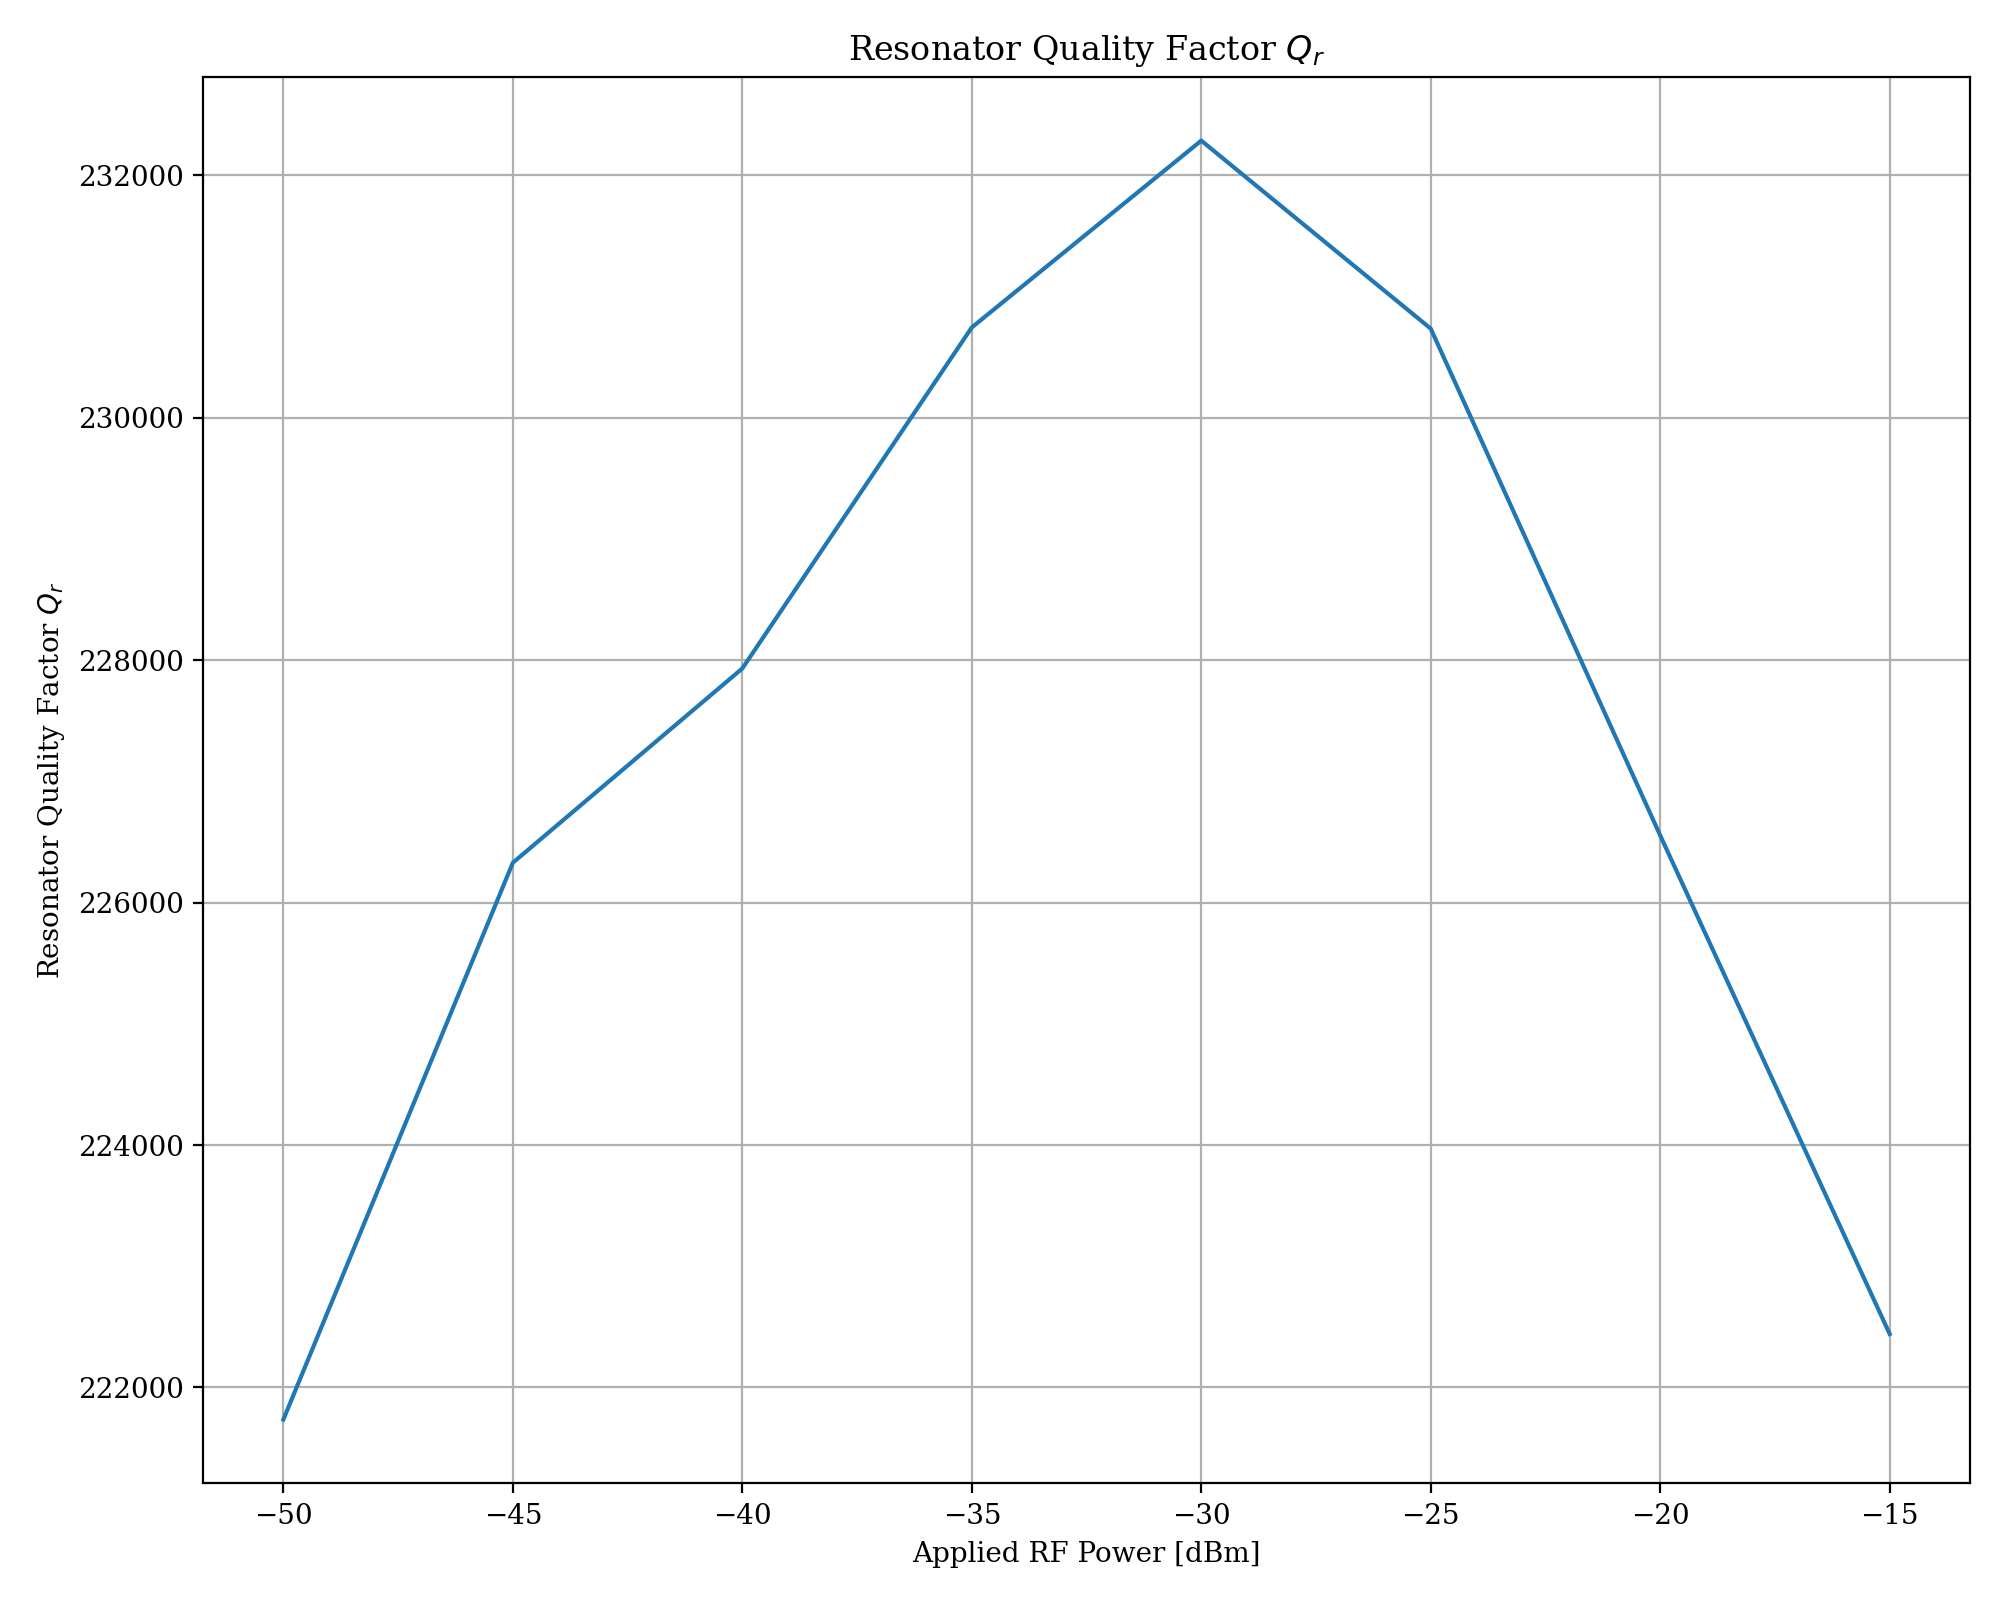

<IPython.core.display.Javascript object>


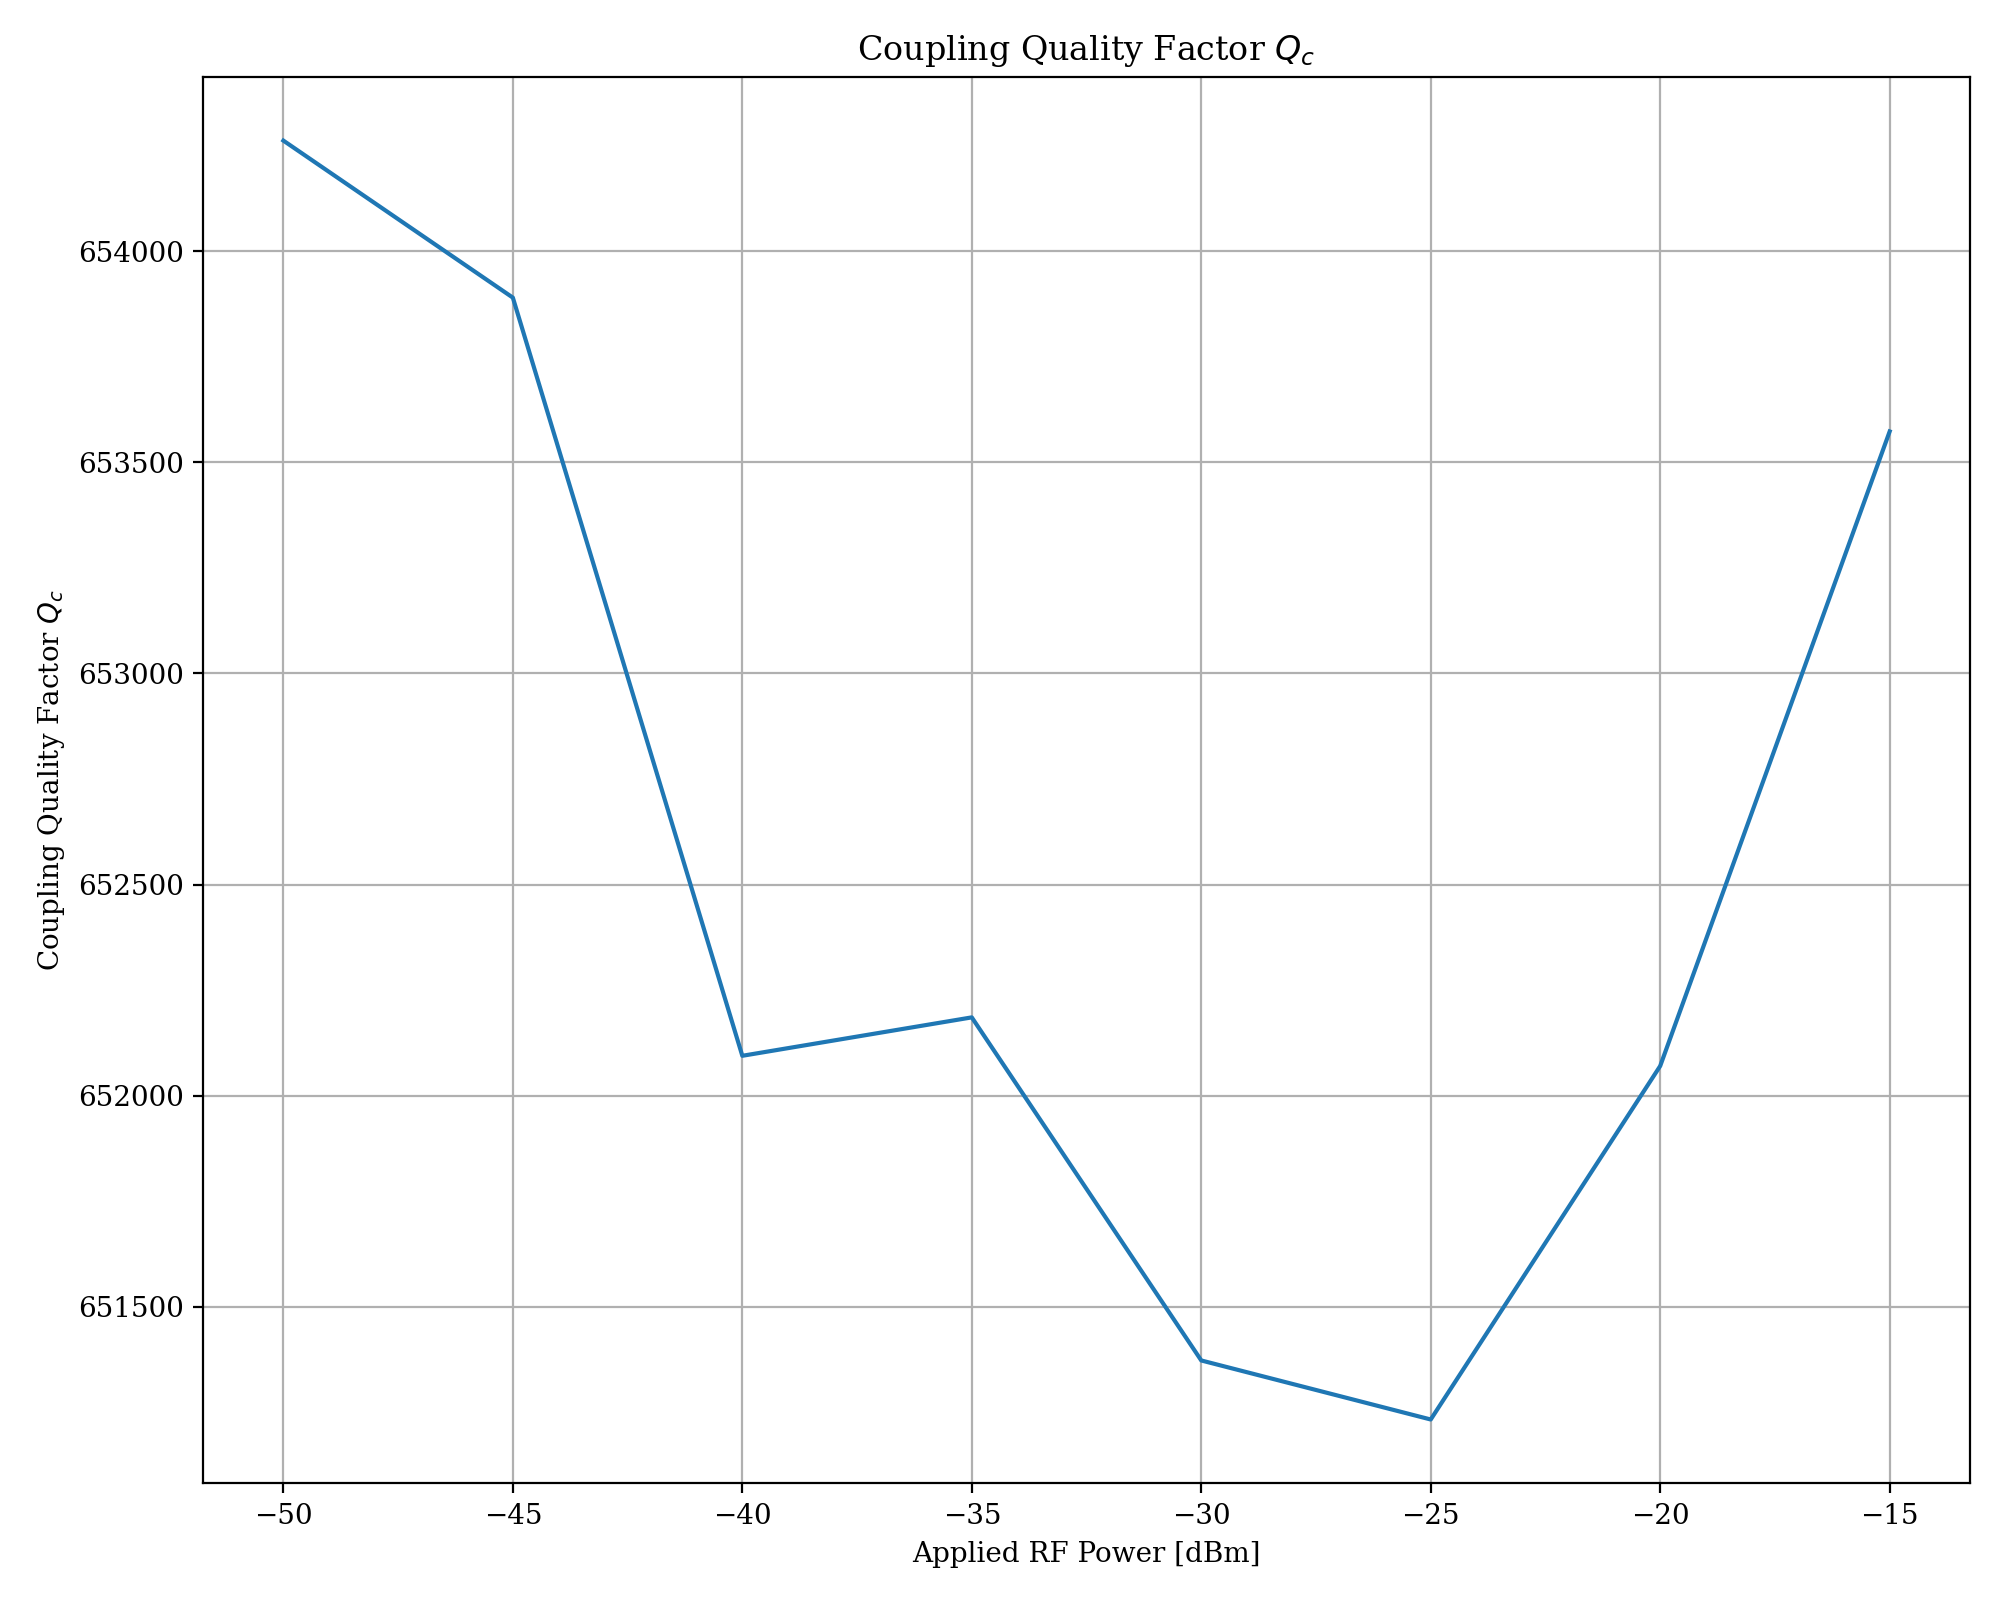

<IPython.core.display.Javascript object>


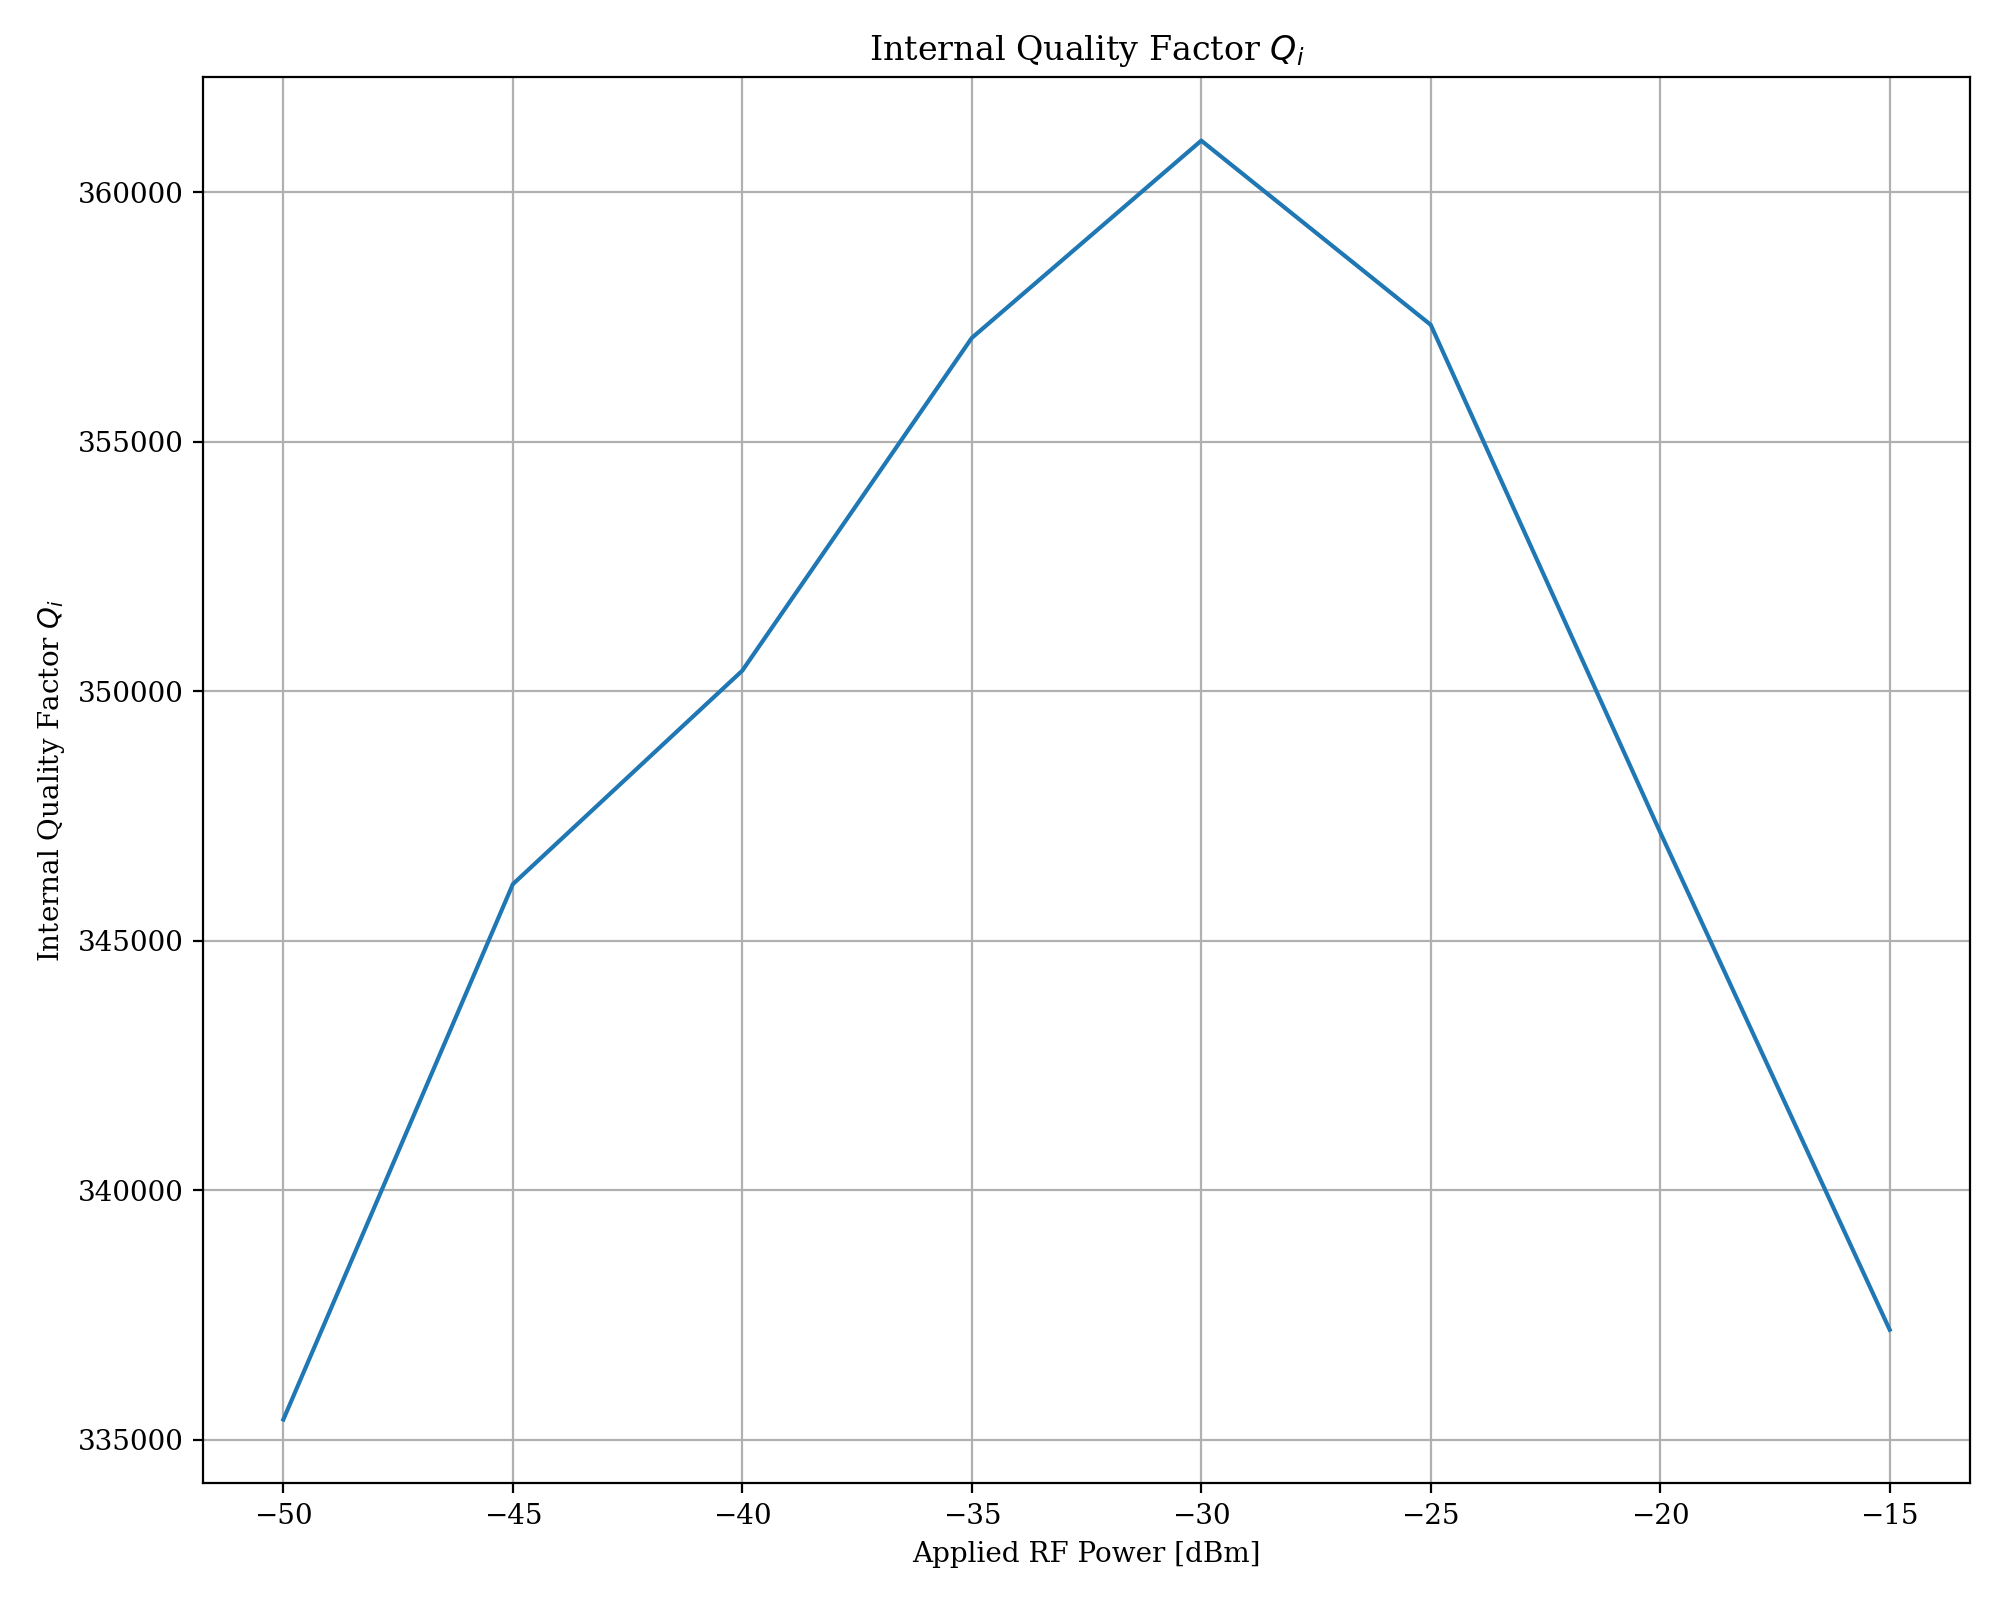

In [7]:
## Define all the lists in which we'll store fit parameters
## Make these fixed size arrays or delete completely since it seems
## to be a little redundant
fr_list = []; Qr_list = []; Qc_list = []; Qi_list = []; 
power_list = []

## Create somewhere for the output
create_dirs()

## Get all the files for a specified series
vna_files = get_input_files(series)

## Create a class instance containing the fit results for this series
result = fitres.SeriesFitResult(day,series)
result.resize_file_fits(len(vna_files))

ax_vnaf = plt.figure(figsize=(10,8)).gca()
ax_vnaf.set_xlabel('Frequency [GHz]')
ax_vnaf.set_ylabel(r'$20 \times \log_{10} |S_{21}|$')
ax_vnaf.set_title(r'Power Scan')

ax_vnap = plt.figure(figsize=(10,8)).gca()
ax_vnap.set_xlabel(r'$\Re (S_{21})$')
ax_vnap.set_xlabel(r'$\Im (S_{21})$')
ax_vnap.set_title(r'Power Scan')

for i in np.arange(len(vna_files)):
    ## Fit this data file
    pwr, fr, Qr, Qc, Qi, res = fit_single_file(vna_files[i],
        show_plots=show_plots,ax_vnaf=ax_vnaf,ax_vnap=ax_vnap,color='C'+str(i))
    result.file_fits[i] = res 
    result.powers[i] = pwr
    result.fit_fr[i] = fr
    result.fit_Qr[i] = Qr
    result.fit_Qi[i] = Qi
    result.fit_Qc[i] = Qc

    ## Store the fit results
    fr_list.append(fr); Qr_list.append(Qr)
    Qc_list.append(Qc); Qi_list.append(Qi)
    power_list.append(pwr)

ax_vnaf.legend()
ax_vnap.legend()
    
## Store the fit results
if save_plots:
    result.save_to_file(out_path)

fig = plt.figure()
plt.plot(power_list,fr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator frequency $f$ [Hz]')
plt.title(r'Resonator frequency')
if save_plots:
    fig.savefig(os.path.join(out_path,"f_vs_P.png"), format='png')

fig = plt.figure()
plt.plot(power_list,(fr_list-np.max(fr_list))/np.max(fr_list))
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'$\Delta f/f$')
plt.title(r'Resonator frequency fractional shift')
if save_plots:
    fig.savefig(os.path.join(out_path,"df_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator Quality Factor $Q_r$')
plt.title(r'Resonator Quality Factor $Q_r$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qr_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qc_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Coupling Quality Factor $Q_c$')
plt.title(r'Coupling Quality Factor $Q_c$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qc_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qi_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Internal Quality Factor $Q_i$')
plt.title(r'Internal Quality Factor $Q_i$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qi_vs_P.png"), format='png')